# ALMA Science Archive School 2022 (Exercises + Solutions)
#### Authors: Toma Badescu, George Bendo, Aida Ahmadi, Ashley Bemis

 * This hands-on session is part of the first ALMA Science Archive School taking place in Bologna, Italy, on Oct. 5-7, 2022. 

 * It contains exercises that cover some of the ways one can query the [ALMA Science Archive (ASA)](https://almascience.eso.org/aq/). 

 * Each cell can be executed by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>. 
 
 * You may enter your attempts in the empty cells and create new cells by clicking the <kbd>+</kbd> button.
 
This exercise sheet is divided into four parts as follows. In the first three you get to work on some exercises that highlight some of the ways one can query and mine the ALMA Science Archive. In the last part, you get to work on your own research problem and we are happy to help you with your specific case. Feel free to jump between topics and use the allotted time as it is most efficient for you.

### [Part 1. pyVO](#pyVO)
### [Part 2. astroquery](#astroquery)
### [Part 3. ALminer](#alminer)
### [Part 4. Your own workstation](#workstation)

# Part 1. pyVO<a name="pyVO"></a>

pyVO is a python Virtual Observatory (VO) package that is designed for searching and accessing data from archives that use VO standards. Although astroquery can also be used within python to query the ALMA archive, pvVO is the only python tool that is officially supported by the ALMA archive developers.

The package can be installed using `pip install pyvo`.

This section covers the following topics:

* Searching by various parameters (including target position, frequency, and polarization).
* Using wildcards (%).
* Resolving coordinate names and searching at those coordinates.
* Searching using multiple criteria.
* Returning only a subset of available columns in the search results.


### Resources:

* For help on the language that is used in setting up queries see [the ADQL documentation page](https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html).
* For examples on using pyVO to query the ALMA archive see [the series of notebooks on the ALMA Science Portal](https://almascience.eso.org/alma-data/archive/archive-notebooks).


### PyVO set-up

Aside from the standard import command, an additional command is needed to set up access to the archvie.  Once this is set up, it is possible to perform a large series of searches.

In [2]:
# Import pvVO:
import pyvo

# Set up access to the ESO archive:
service = pyvo.dal.TAPService("https://almascience.eso.org/tap")

# If, for whatever reason, the ESO archive is down, you may use the NRAO/NAOJ mirrors:
# service = pyvo.dal.TAPService("https://almascience.nrao.edu/tap")
# service = pyvo.dal.TAPService("https://almascience.nao.ac.jp/tap")

#### Get all possible column name, their description, and units

In [3]:
import pandas as pd

# Query the metadata
metadata_query = "SELECT column_name, datatype, unit, ucd, utype, description from TAP_SCHEMA.columns"
TAP_metadata = service.search(metadata_query)
TAP_metadata_pd = pd.DataFrame(TAP_metadata).set_index('column_name')

# print all possible columns
pd.set_option('display.max_colwidth', None)
print(TAP_metadata_pd.index.to_list())
print("")

# get the description of a given column (for example, the 'frequency' column)
print("{} description: {}\n".format('frequency', TAP_metadata_pd.loc['frequency', 'description']))

# get the units of a given column (for example, the 'frequency' column)
print("{} units: {}\n".format('frequency', TAP_metadata_pd.loc['frequency', 'unit']))

['collections', 'o_ucd', 'schema_index', 'schema_name', 'utype', 'description', 'schema_name', 'table_name', 'table_type', 'utype', 'description', 'table_index', 'table_name', 'column_name', 'utype', 'ucd', 'unit', 'description', 'datatype', 'arraysize', 'xtype', '"size"', 'principal', 'indexed', 'std', 'column_index', 'key_id', 'from_table', 'target_table', 'utype', 'description', 'key_id', 'from_column', 'target_column', 'obs_publisher_did', 'obs_collection', 'facility_name', 'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level', 'target_name', 's_ra', 's_dec', 's_fov', 's_region', 's_xel1', 's_xel2', 'em_xel', 't_xel', 'pol_xel', 's_resolution', 't_min', 't_max', 't_exptime', 't_resolution', 'em_min', 'em_max', 'em_res_power', 'pol_states', 'access_url', 'access_format', 'access_estsize', 'proposal_id', 'data_rights', 'gal_longitude', 'gal_latitude', 'band_list', 'em_resolution', 'bandwidth', 'antenna_arrays', 'is_mosaic', 'obs_release_date', 'spatial_resolution', 'frequenc

### Example 1.1: Search for the coordinates RA=204.253958 and Dec=-29.865417, with a radius of 0.006 degrees

In [2]:
query = f""" \
            SELECT * \
            FROM ivoa.obscore \
            WHERE INTERSECTS(CIRCLE('ICRS',204.253958,-29.865417,0.006),s_region)=1 \
            """
output = service.search(query).to_table().to_pandas()

Note that the output from the query should be converted to a [PANDAS DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html). The pandas.DataFrame object has multiple columns with quantities that can be either printed or used for multiple other purposes. A complete list of the columns in the object can be displayed using 'pandas.DataFrame.columns'. These columns can also be used to perform other queries as you will see further below.

#### Display the output query table:

In [3]:
output

,collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,...,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
0,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2015.1.01593.S,ALMA,JAO,ALMA,uid://A001/X2fe/X3d4.source.m83.spw.35,cube,2,m83,...,Multi CO line imaging of the nearby galaxy M83...,S,TARGET WVR,T,264.543277,T,2021PASJ...73..552M,"Spiral galaxies, Giant Molecular Clouds (GMC) ...",Local Universe,2022-09-26T16:46:17.754
1,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2015.1.01593.S,ALMA,JAO,ALMA,uid://A001/X2fe/X3d4.source.m83.spw.29,cube,2,m83,...,Multi CO line imaging of the nearby galaxy M83...,S,TARGET WVR,T,264.543277,T,2021PASJ...73..552M,"Spiral galaxies, Giant Molecular Clouds (GMC) ...",Local Universe,2022-09-26T16:46:17.754
2,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2015.1.01593.S,ALMA,JAO,ALMA,uid://A001/X2fe/X3d4.source.m83.spw.33,cube,2,m83,...,Multi CO line imaging of the nearby galaxy M83...,S,TARGET WVR,T,264.543277,T,2021PASJ...73..552M,"Spiral galaxies, Giant Molecular Clouds (GMC) ...",Local Universe,2022-09-26T16:46:17.754
3,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2015.1.01593.S,ALMA,JAO,ALMA,uid://A001/X2fe/X3d4.source.m83.spw.31,cube,2,m83,...,Multi CO line imaging of the nearby galaxy M83...,S,TARGET WVR,T,264.543277,T,2021PASJ...73..552M,"Spiral galaxies, Giant Molecular Clouds (GMC) ...",Local Universe,2022-09-26T16:46:17.754
4,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2013.1.00889.S,ALMA,JAO,ALMA,uid://A001/X144/X156.source.M83.spw.21,cube,2,M83,...,Chemical Variation between a Spiral Arm and a ...,S,TARGET,T,15.636168,T,,Galaxy chemistry,Galaxy evolution,2022-09-26T16:46:17.754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2021.1.00079.S,ALMA,JAO,ALMA,uid://A001/X158f/Xacd.source.M83.spw.21,cube,2,M83,...,Atomic carbon in a prototypical barred-spiral ...,S,TARGET,T,192.255228,T,,"Starbursts, star formation, Spiral galaxies",Active galaxies,2022-09-26T16:46:17.754
138,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2021.1.00079.S,ALMA,JAO,ALMA,uid://A001/X158f/Xad9.source.M83.spw.23,cube,2,M83,...,Atomic carbon in a prototypical barred-spiral ...,S,TARGET,T,192.255229,T,,"Starbursts, star formation, Spiral galaxies",Active galaxies,2022-09-26T16:46:17.754
139,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2021.1.00079.S,ALMA,JAO,ALMA,uid://A001/X158f/Xad9.source.M83.spw.17,cube,2,M83,...,Atomic carbon in a prototypical barred-spiral ...,S,TARGET,T,192.255229,T,,"Starbursts, star formation, Spiral galaxies",Active galaxies,2022-09-26T16:46:17.754
140,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2021.1.00079.S,ALMA,JAO,ALMA,uid://A001/X158f/Xad9.source.M83.spw.19,cube,2,M83,...,Atomic carbon in a prototypical barred-spiral ...,S,TARGET,T,192.255229,T,,"Starbursts, star formation, Spiral galaxies",Active galaxies,2022-09-26T16:46:17.754


Note that if you want to display all rows/columns you need to run the following cells first (but beware this may overload your browser and crash the notebook!). Instead, you can save tables to files that can be opened by other programs and read in later too. In the case of pandas.DataFrame, this can be done with [pandas.DataFrame.to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) function.

In [4]:
# import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

#### Display all the column names in the output query:

In [5]:
print(output.columns)

Index(['collections', 'o_ucd', 'obs_publisher_did', 'obs_collection',
       'facility_name', 'instrument_name', 'obs_id', 'dataproduct_type',
       'calib_level', 'target_name', 's_ra', 's_dec', 's_fov', 's_region',
       's_xel1', 's_xel2', 'em_xel', 't_xel', 'pol_xel', 's_resolution',
       't_min', 't_max', 't_exptime', 't_resolution', 'em_min', 'em_max',
       'em_res_power', 'pol_states', 'access_url', 'access_format',
       'access_estsize', 'proposal_id', 'data_rights', 'gal_longitude',
       'gal_latitude', 'band_list', 'em_resolution', 'bandwidth',
       'antenna_arrays', 'is_mosaic', 'obs_release_date', 'spatial_resolution',
       'frequency_support', 'frequency', 'velocity_resolution',
       'obs_creator_name', 'pub_title', 'first_author', 'authors',
       'pub_abstract', 'publication_year', 'proposal_abstract',
       'schedblock_name', 'proposal_authors', 'sensitivity_10kms',
       'cont_sensitivity_bandwidth', 'pwv', 'group_ous_uid', 'member_ous_uid',
       '

#### Display the unique proposal IDs associated with the search results:

In [6]:
print(output['proposal_id'].unique())

['2015.1.01593.S' '2013.1.00889.S' '2012.1.00762.S' '2013.1.01312.S'
 '2015.1.01177.S' '2013.1.01161.S' '2015.1.00175.S' '2017.1.00079.S'
 '2016.1.00164.S' '2015.1.00121.S' '2019.1.01117.S' '2021.1.00079.S'
 '2019.2.00033.S']


#### Plot the right ascension and declination of all fields in the search results using `matplotlib`:

In [7]:
import matplotlib.pyplot as plt

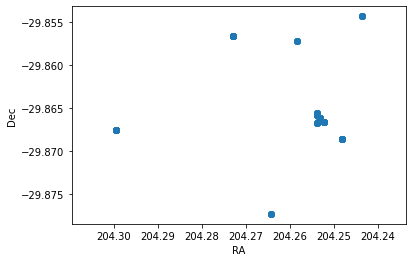

In [8]:
plt.plot(output['s_ra'],output['s_dec'],marker='o',linestyle='none')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.xlim([max(output['s_ra'])+0.01,min(output['s_ra']-0.01)])
plt.ticklabel_format(useOffset=False)

### Example 1.2: Search by ALMA project code (e.g. ALMA Large Program PHANGS 2017.1.00886.L)

In [9]:
query = f""" \
            SELECT * \
            FROM ivoa.obscore \
            WHERE proposal_id like '%2017.1.00886.L%'\
            """
output = service.search(query).to_table().to_pandas()
output

,collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,...,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
0,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X2883.source.NGC1317.spw.29,cube,2,NGC1317,...,"100,000 Molecular Clouds Across the Main Seque...",L,TARGET,T,10.984778,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
1,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X2883.source.NGC1317.spw.25,cube,2,NGC1317,...,"100,000 Molecular Clouds Across the Main Seque...",L,TARGET,T,10.984778,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
2,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X2883.source.NGC1317.spw.19,image,2,NGC1317,...,"100,000 Molecular Clouds Across the Main Seque...",L,TARGET,T,10.984778,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
3,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X2883.source.NGC1317.spw.27,cube,2,NGC1317,...,"100,000 Molecular Clouds Across the Main Seque...",L,TARGET,T,10.984778,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
4,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X283d.source.J0519-4546.spw.19,image,2,J0519-4546,...,"100,000 Molecular Clouds Across the Main Seque...",L,BANDPASS FLUX WVR,F,8.672874,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X27e5.source.J0922-3959.spw.18,image,2,J0922-3959,...,"100,000 Molecular Clouds Across the Main Seque...",L,PHASE WVR,F,30.595048,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
2156,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X27d9.source.J0849-3541.spw.29,cube,2,J0849-3541,...,"100,000 Molecular Clouds Across the Main Seque...",L,PHASE WVR,F,11.476975,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
2157,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X27d9.source.J0849-3541.spw.19,image,2,J0849-3541,...,"100,000 Molecular Clouds Across the Main Seque...",L,PHASE WVR,F,11.476975,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754
2158,,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00886.L,ALMA,JAO,ALMA,uid://A001/X1284/X27d9.source.J0849-3541.spw.25,cube,2,J0849-3541,...,"100,000 Molecular Clouds Across the Main Seque...",L,PHASE WVR,F,11.476975,T,2019MNRAS.490.1220K 2020ApJ...892..148S 2020Ap...,"Surveys of galaxies, Giant Molecular Clouds (G...",Galaxy evolution,2022-09-26T16:46:17.754


### Example 1.3: Search for full polarization data & print unique project codes

In [10]:
query = f""" \
            SELECT * \
            FROM ivoa.obscore \
            WHERE pol_states like '%/XX/XY/YX/YY/%' \
            """
output = service.search(query).to_table().to_pandas()
print(output['proposal_id'].unique())

['2019.1.01482.T' '2016.1.00071.S' '2017.1.00793.S' '2017.1.00608.S'
 '2019.1.00086.S' '2018.1.00568.S' '2018.1.00457.S' '2017.1.00834.S'
 '2017.A.00021.T' '2018.1.00001.CAL' '2015.1.00546.S' '2016.1.01116.V'
 '2011.0.00003.E' '2016.1.01290.V' '2013.1.00976.S' '2018.1.01172.S'
 '2016.1.00017.S' '2016.1.01073.S' '2018.1.01405.T' '2016.1.01216.V'
 '2011.0.00017.SV' '2013.1.00994.S' '2016.1.00863.S' '2015.1.01503.S'
 '2017.1.00101.S' '2016.1.00248.S' '2018.1.01873.S' '2016.1.01404.V'
 '2018.1.01177.S' '2016.1.00605.S' '2015.1.01020.S' '2016.1.00369.S'
 '2016.1.00415.S' '2015.1.01112.S' '2016.1.01089.S' '2017.1.00044.S'
 '2013.1.01369.S' '2018.1.00353.S' '2016.1.01484.S' '2018.1.00579.T'
 '2016.1.00517.S' '2021.1.01431.V' '2021.1.00657.T' '2016.1.01154.V'
 '2016.1.01601.S' '2017.1.00797.V' '2017.1.00991.V' '2015.1.00492.S'
 '2016.1.01176.V' '2017.1.00841.V' '2021.1.01567.V' '2017.1.01181.V'
 '2016.1.00604.S' '2021.1.01156.V' '2017.1.01428.S' '2018.1.00827.S'
 '2021.1.01458.V' '2021.1.00889

### Example 1.4: Search for all programs from Cycle 6 proposals (project codes beginning with 2018) & print unique project codes

In [11]:
query = f""" \
            SELECT * \
            FROM ivoa.obscore \
            WHERE proposal_id like '%2018%'\
            """
output = service.search(query).to_table().to_pandas()
print(output['proposal_id'].unique())

['2018.1.00804.S' '2018.1.01454.T' '2018.1.00585.S' '2018.1.00526.S'
 '2018.A.00047.S' '2018.1.01783.S' '2018.1.00329.S' '2018.1.01347.S'
 '2018.1.00945.S' '2018.1.01879.S' '2018.1.01044.S' '2018.1.01205.L'
 '2018.1.01054.S' '2018.1.01050.S' '2018.1.00816.S' '2018.1.01276.S'
 '2018.1.01064.S' '2018.1.00003.S' '2018.1.01103.S' '2018.1.00940.S'
 '2018.1.00797.S' '2018.1.00437.S' '2018.1.00576.S' '2018.1.00162.S'
 '2018.1.01726.S' '2018.1.00302.S' '2018.A.00061.S' '2018.1.01128.S'
 '2018.1.01617.T' '2018.1.01115.S' '2018.1.00489.S' '2018.1.01670.S'
 '2018.A.00063.S' '2018.1.01225.S' '2018.1.00659.L' '2018.1.00035.L'
 '2018.1.00612.S' '2018.1.00568.S' '2018.1.00934.S' '2018.1.00597.S'
 '2018.1.00457.S' '2018.1.01171.S' '2018.1.01782.S' '2018.1.00523.S'
 '2018.1.01753.S' '2018.1.00001.CAL' '2018.1.00614.S' '2018.1.01034.T'
 '2018.1.00452.S' '2018.1.00525.S' '2018.1.01774.S' '2018.1.01309.S'
 '2018.1.01616.S' '2018.A.00038.S' '2018.1.01755.S' '2018.1.00492.S'
 '2018.A.00037.S' '2018.1.01750.

### Example 1.5: Search for data by frequency (e.g. all observations covering the range 115.20 to 115.35 GHz) & print unique project codes

In [4]:
query = f"""   
            SELECT * \
            FROM ivoa.obscore   
            WHERE (frequency - 0.5 * bandwidth/1e9) < {115.20} 
            AND (frequency + 0.5 * bandwidth/1e9) > {115.35} 
            """
output = service.search(query).to_table().to_pandas()
print(output['proposal_id'].unique())

['2019.1.00722.S' '2021.1.00199.S' '2018.A.00047.S' '2012.1.00762.S'
 '2019.2.00139.S' '2019.1.00743.S' '2012.1.00641.S' '2011.0.00645.S'
 '2011.0.00131.S' '2011.0.00772.S' '2011.0.00099.S' '2011.0.00004.SV'
 '2011.0.00273.S' '2011.0.00172.S' '2013.1.01042.S' '2011.0.00754.S'
 '2011.0.00510.S' '2015.1.01538.S' '2018.1.01783.S' '2015.1.01019.S'
 '2016.1.00772.S' '2013.1.00470.S' '2012.1.00532.S' '2015.1.01287.S'
 '2021.1.00607.S' '2021.1.01307.S' '2016.1.01123.S' '2017.1.01500.S'
 '2016.1.00605.S' '2019.1.00347.S' '2016.1.01119.S' '2016.A.00021.T'
 '2016.2.00006.S' '2013.1.00351.S' '2018.1.00010.S' '2017.1.00248.S'
 '2017.1.00501.S' '2017.1.00999.S' '2013.1.00180.S' '2017.1.01558.S'
 '2016.1.00026.S' '2013.1.00096.S' '2016.1.00021.S' '2013.1.01262.S'
 '2012.1.00683.S' '2016.1.00005.S' '2017.1.00339.S' '2016.1.00635.S'
 '2011.0.00015.SV' '2013.1.00556.S' '2016.1.00922.S' '2021.1.00313.S'
 '2018.1.00824.S' '2017.1.00161.L' '2019.1.01098.S' '2017.1.01003.S'
 '2017.A.00045.T' '2016.1.00187.

### Example 1.6: Resolve a source name and search at that position
Note that this is not the same as searching by the target name used in the ALMA observations. 

#### First use `astropy` to obtain the position of the target "Cen A":

In [13]:
import astropy
coordinates = astropy.coordinates.SkyCoord.from_name("Cen A")
ra=float(coordinates.ra.degree)
dec=float(coordinates.dec.degree)

#### Now query for the obtained position within a search radius of 0.006 degrees and print the unique project codes:

In [14]:
query = f""" \
            SELECT * \
            FROM ivoa.obscore \
            WHERE INTERSECTS(CIRCLE('ICRS',{ra},{dec},0.006),s_region)=1 \
            """
output = service.search(query).to_table().to_pandas()
print(output['proposal_id'].unique())

['2012.1.00225.S' '2011.0.00010.S' '2011.0.00121.S' '2011.0.00628.S'
 '2012.1.00019.S' '2013.1.00803.S' '2013.1.00099.S' '2013.1.01342.S'
 '2012.1.00604.S' '2015.1.00483.S' '2015.1.00650.S' '2015.1.00421.S'
 '2013.1.01282.S' '2016.1.00714.S' '2016.1.01198.V' '2016.1.01176.V'
 '2017.1.00005.S' '2017.1.01162.S' '2011.0.00008.SV' '2017.1.01181.V'
 '2018.A.00062.S' '2019.2.00031.S' '2021.1.01398.S' '2021.1.01515.V'
 '2015.1.00001.CAL']


### Example 1.7: Query all Band 3 full polarization data from Cycle 7

In [15]:
query = f""" \
            SELECT * \
            FROM ivoa.obscore \
            WHERE proposal_id like '%2019%' \
            AND band_list like '3' \
            AND pol_states like '%/XX/XY/YX/YY/%' \
            """
output = service.search(query).to_table().to_pandas()
print(output['proposal_id'].unique())

['2019.1.01031.S' '2019.1.01016.T' '2019.1.01482.T' '2019.1.00146.S'
 '2019.1.01768.S' '2019.1.00500.S' '2019.1.01209.S' '2019.1.00183.V'
 '2019.1.00636.V' '2019.1.01500.S' '2019.1.01128.S' '2019.1.00037.S'
 '2019.1.00039.S']


### Example 1.8: Query by both position and frequency constraints (e.g. combining examples 1.1 and 1.5) but only return the following four columns in the output: proposal_id, member_ous_uid, frequency, bandwidth

In [5]:
query = f"""   
            SELECT proposal_id, member_ous_uid, frequency, bandwidth
            FROM ivoa.obscore   
            WHERE INTERSECTS(CIRCLE('ICRS',204.253958,-29.865417,0.006),s_region)=1 
            AND (frequency - 0.5 * bandwidth/1e9) < {115.00}
            AND (frequency + 0.5 * bandwidth/1e9) > {115.15} 
            """
output = service.search(query).to_table().to_pandas()
output

,proposal_id,member_ous_uid,frequency,bandwidth
0,2012.1.00762.S,uid://A002/X788a57/X43,115.072020,1.000000e+09
1,2017.1.00079.S,uid://A001/X1295/X31,115.071625,2.500000e+08
2,2017.1.00079.S,uid://A001/X1295/X31,115.071637,5.000000e+08
3,2017.1.00079.S,uid://A001/X1295/X31,114.801052,2.000000e+09
4,2017.1.00079.S,uid://A001/X1295/X1d,115.071610,2.500000e+08
5,2017.1.00079.S,uid://A001/X1295/X1d,115.071618,5.000000e+08
6,2017.1.00079.S,uid://A001/X1295/X1d,114.801050,2.000000e+09
7,2017.1.00079.S,uid://A001/X1295/X29,115.071475,5.000000e+08
8,2017.1.00079.S,uid://A001/X1295/X29,115.071462,2.500000e+08
9,2017.1.00079.S,uid://A001/X1295/X29,114.800706,2.000000e+09


### Example 1.9: Download data associated with a specific MOUS (e.g. uid___A001_X135b_X6b)

Downloading data with pyVO is relatively straightforward, although it is primarily done by one Member OUS at a time.  

Note that the Member OUSs need to be formatted with underscores (\_), whereas the member_ous_id column from pyVO searches are in a different format (see the table in the previous example).  The colon (:) and slashes (/) in the pyVO search results need to be replaced with underscores in this command, as shown in this example:

pyVO search output: uid://A001/X135b/X6b

pyVO download string: uid\_\_\_A001\_X135b\_X6b

In [17]:
import os
datalink = pyvo.dal.adhoc.DatalinkResults.from_result_url(
    f"https://almascience.eso.org/datalink/sync?ID={'uid___A001_X135b_X6b'}")
for dl in datalink: 
    dl.cachedataset(filename=os.path.basename(dl['access_url']))

You should now be able to see some tar files downloaded in your current working directory.

# Part 2. Astroquery<a name="astroquery"></a>

Astroquery is a set of tools for querying astronomical web forms and databases. 

It can be installed using `pip install --pre astroquery`

In this part we use astroquery's catalog and archive search functionality in addition to its line list services to find recent ALMA data on the CO 1-0 transition across M83. This can be adapted to similar extragalactic projects.

This section covers the following exercises:
1. [Perform an object query of the ALMA science archive](#object_query)
2. [Use source redshift to check which ALMA band covers line](#using_redshift)
3. [Download ALMA data using Astroquery](#download_data)
4. [Send TAP queries (similar to pyVO)](#astroquery_tap)
5. [Compare catalogs](#compare_catalogs)

### Resources:
- If you want to access help for a particular command, type `help(command)` and run the cell
- The Astroquery readthedocs is located [here](https://astroquery.readthedocs.io/en/latest/).
- We suggest running Astroquery version 0.4.7. Some steps of this tutorial will not work in earlier versions, such as HSA search functionionality or ALMA authentication.
- The output of astroquery searches are astropy tables (see [astropy tables documentation page](https://docs.astropy.org/en/stable/table/index.html) for more information on how to work with them).

### Astroquery set-up

In [18]:
# Import Astroquery and check your current working version by doing the following:
import astroquery
print("astroquery version: {}".format(astroquery.__version__))

# Import astroquery's ALMA archive search tool and other useful packages:
from astroquery.alma import Alma
import numpy as np
import astropy.units as u

#instantiate alma object/class
alma = Alma()

# If you have access to proprietary data that you want to work with, you will need to login to your ALMA account:
#login_name = ""
#alma.login(login_name)

astroquery version: 0.4.7.dev8038


<a id="object_query"></a>
### Example 2.1 Perform an object query of the ALMA science archive

We perform an ALMA object query (`alma.query_object`). Astroquery sends the source name to the ALMA Archive, which then resolves the source coordinates using, i.e. Simbad, NED, and Vizier, for matches to the object name. Astroquery returns an astropy table containing information on all of the ALMA archival data towards M83's coordinates.

Note that you can instead perform a region search (`alma.query_region`) using Astroquery specifying a search radius. The default ALMA search radius is 10 arcminutes.


#### Use an object query to search the ALMA archive for M83 observations & print the resulting astropy table:

In [19]:
q_results = alma.query_object("M83")
# Astroquery returns an astropy table with all ALMA results matching the coordinates to M83.

print("Here is the astropy table returned for M83:\n")
# print(q_results)
q_results

Here is the astropy table returned for M83:



collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
,,,,,,,,,,deg,deg,deg,,,,,,,arcsec,d,d,s,s,m,m,,,,,kbyte,,,deg,deg,,m,Hz,,,,arcsec,GHz,GHz,m / s,,,,,,,,,,mJy / beam,mJy / beam,mm,,,,,,,,arcsec,,,,,
str128,str35,str33,str4,str3,str4,str64,str5,int32,str256,float64,float64,float64,object,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,str64,str72,str9,int32,str64,str11,float64,float64,str30,float64,float64,str660,str1,object,float64,str4000,float64,float64,str256,str256,str256,str4000,str4000,int32,str4000,str128,str2000,float64,float64,float32,str64,str64,str32,str256,str16,str256,str1,float64,str1,str4000,str200,str200,str32
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2015.1.00175.S,ALMA,JAO,ALMA,uid://A001/X2df/Xe2.source.M83.spw.29,cube,2,M83,204.25373627465964,-29.86555555555463,0.015720983490855506,Polygon ICRS 204.261679 -29.861768 204.262357 -29.863126 204.262729 -29.864570 204.262783 -29.866049 204.262516 -29.867510 204.261680 -29.869342 204.260721 -29.870566 204.259514 -29.871612 204.258103 -29.872444 204.256537 -29.873031 204.254305 -29.873401 204.252600 -29.873354 204.250935 -29.873031 204.249369 -29.872444 204.247958 -29.871612 204.246752 -29.870566 204.245793 -29.869342 204.245115 -29.867984 204.244743 -29.866540 204.244744 -29.864570 204.245116 -29.863126 204.245794 -29.861768 204.246752 -29.860545 204.247959 -29.859499 204.249370 -29.858667 204.250935 -29.858080 204.253167 -29.857711 204.254872 -29.857757 204.256537 -29.858080 204.258103 -29.858667 204.259514 -29.859499 204.260720 -29.860545,--,--,1920,1,2,1.5612828117365505,57488.054622,57504.046268,3810.24,3810.24,0.0027519339026355486,0.0028001055291722804,94841.89678010777,/XX/YY/,https://almascience.org/datalink/sync?ID=uid://A001/X2df/Xe2,applicati,--,2015.1.00175.S,Public,314.58354078151916,31.972871619531144,3,338428380490533.25,1875000000.0,A001:DA59 A002:DA49 A004:DA41 A006:DA61 A008:DV08 A009:DV18 A010:DV25 A011:DV09 A014:DV22 A015:DV04 A019:DA64 A023:DA51 A027:DV07 A029:DV10 A030:DA65 A031:DV17 A033:DV20 A034:DA46 A036:DV16 A037:DV19 A038:DA50 A046:DA53 A047:DA55 A048:DV15 A049:DV11 A052:DA47 A060:DA60 A061:DA62 A062:DA56 A063:DA44 A064:DV13 A065:DV06 A067:DA42 A068:DA45 A069:DV14 A070:DV21 A071:DA43 A072:DV05 A073:DA54 A074:DA48 A075:DV24 A076:DA52 A077:DA58 A078:DV12 A080:DV23 A081:DA53 T701:PM03 T704:PM01,F,2018-02-18T00:00:00.000,1.5612828117365505,"[95.06..96.94GHz,1128.91kHz,769.7uJy/beam@10km/s,31.8uJy/beam@native, XX YY] U [96.84..98.71GHz,1128.91kHz,763uJy/beam@10km/s,31.8uJy/beam@native, XX YY] U [107.06..108.94GHz,1128.91kHz,743.4uJy/beam@10km/s,32.6uJy/beam@native, XX YY] U [108.84..110.71GHz,1128.91kHz,788.1uJy/beam@10km/s,34.8uJy/beam@native, XX YY]",108.00176463082421,3109.550316743487,ALMA,,,,,--,"M 83 is the best ALMA target to study spatially-resolved chemistry in the nuclear region of a starburst galaxy. This is because of its proximity, face-on configuration and brightness. It has been proposed from near infrared/optical/UV observations that the gas flowing through the bar into the circumnuclear ring can induce active star formation.This creates an age gradient of stars along the

#### Print the column names of the resulting table:

In [20]:
print("Here is a list of all of the column names of retrieved table:\n")
print(q_results.colnames)

Here is a list of all of the column names of retrieved table:

['collections', 'o_ucd', 'obs_publisher_did', 'obs_collection', 'facility_name', 'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level', 'target_name', 's_ra', 's_dec', 's_fov', 's_region', 's_xel1', 's_xel2', 'em_xel', 't_xel', 'pol_xel', 's_resolution', 't_min', 't_max', 't_exptime', 't_resolution', 'em_min', 'em_max', 'em_res_power', 'pol_states', 'access_url', 'access_format', 'access_estsize', 'proposal_id', 'data_rights', 'gal_longitude', 'gal_latitude', 'band_list', 'em_resolution', 'bandwidth', 'antenna_arrays', 'is_mosaic', 'obs_release_date', 'spatial_resolution', 'frequency_support', 'frequency', 'velocity_resolution', 'obs_creator_name', 'pub_title', 'first_author', 'authors', 'pub_abstract', 'publication_year', 'proposal_abstract', 'schedblock_name', 'proposal_authors', 'sensitivity_10kms', 'cont_sensitivity_bandwidth', 'pwv', 'group_ous_uid', 'member_ous_uid', 'asdm_uid', 'obs_title', 'type', 'scan_int

#### Select observations by time and ALMA band (e.g. bands 7 & 9 and data that is newer than 2017):

In [21]:
from datetime import datetime

# Search table for observations that are from 2017 or later:
# ** Note that this will overwrite the original table.
q_results = q_results[[datetime.fromisoformat(i) > datetime(2018,1,1) for i in q_results['obs_release_date']]] 

# Create a new table by selecting by band,  e.g. specifically band 7 and 9:
# You can also modify this search to select by frequency or science goal.
q_results_b7_b9 = alma.query_object("M83",payload=dict(band_list = [7,9]))

# Search the new table for observations that are from 2017 or later:
q_results_b7_b9 = q_results_b7_b9[[datetime.fromisoformat(i) > datetime(2018,1,1) for i in q_results_b7_b9['obs_release_date']]]
print("M83, Band 7 and 9, newer than 2017:")
q_results_b7_b9

M83, Band 7 and 9, newer than 2017:


collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
,,,,,,,,,,deg,deg,deg,,,,,,,arcsec,d,d,s,s,m,m,,,,,kbyte,,,deg,deg,,m,Hz,,,,arcsec,GHz,GHz,m / s,,,,,,,,,,mJy / beam,mJy / beam,mm,,,,,,,,arcsec,,,,,
str128,str35,str33,str4,str3,str4,str64,str5,int32,str256,float64,float64,float64,object,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,str64,str72,str9,int32,str64,str11,float64,float64,str30,float64,float64,str660,str1,object,float64,str4000,float64,float64,str256,str256,str256,str4000,str4000,int32,str4000,str128,str2000,float64,float64,float32,str64,str64,str32,str256,str16,str256,str1,float64,str1,str4000,str200,str200,str32
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2016.1.00164.S,ALMA,JAO,ALMA,uid://A001/X888/X240.source.M83.spw.16,cube,2,M83,204.2536941223603,-29.86660462597014,0.014363170493518181,Polygon ICRS 204.258256 -29.870560 204.257579 -29.871898 204.256687 -29.872834 204.255553 -29.873548 204.254251 -29.873995 204.252861 -29.874148 204.251471 -29.873995 204.250168 -29.873548 204.248787 -29.872619 204.247546 -29.870799 204.245840 -29.864935 204.246361 -29.862567 204.248424 -29.860539 204.250371 -29.859870 204.252465 -29.859870 204.258861 -29.861376 204.261109 -29.862793 204.262293 -29.864974 204.262119 -29.867379 204.260630 -29.869415,--,--,1024,1,2,3.9479158780402144,57705.647776,57715.536031,3054.543,3054.543,0.0010699208399052808,0.0010776050740875435,144553.92439991143,/XX/YY/,https://almascience.org/datalink/sync?ID=uid://A001/X888/X240,applicati,--,2016.1.00164.S,Public,314.583242301816,31.971852866265507,7,581112016510216.0,2000000000.0,J501:CM10 J502:CM02 J503:CM03 J504:CM12 J505:CM08 J506:CM05 N601:CM07 N602:CM01 N603:CM09 N604:CM11 N605:CM04 N606:CM06,T,2019-06-10T00:00:00.000,3.9479158780402144,"[278.20..280.20GHz,1938.48kHz,10.8mJy/beam@10km/s,740.1uJy/beam@native, XX YY] U [279.97..281.97GHz,1938.48kHz,10.7mJy/beam@10km/s,735.5uJy/beam@native, XX YY] U [290.20..292.20GHz,1938.48kHz,11.6mJy/beam@10km/s,806.9uJy/beam@native, XX YY] U [291.97..293.97GHz,1938.48kHz,12.4mJy/beam@10km/s,865uJy/beam@native, XX YY]",279.2015634829261,1990.2973652431529,ALMA,Chemical Evolution along the Circumnuclear Ring of M83,"Harada, Nanase","Harada, Nanase; Sakamoto, Kazushi; Martín, Sergio; Watanabe, Yoshimasa; Aladro, Rebeca; Riquelme, Denise; Hirota, Akihiko","We report an astrochemical study on the evolution of interstellar molecular clouds and consequent star formation in the center of the barred spiral galaxy M83. We used the Atacama Large Millimeter/submillimeter Array (ALMA) to image molecular species indicative of shocks (SiO and CH<SUB>3</SUB>OH), dense cores (N<SUB>2</SUB>H<SUP>+</SUP>), and photodissociation regions (CN and CCH), as well as a radio recombination line (H41α) tracing active star-forming regions. M83 has a circumnuclear gas ring that is joined at two intersections by gas streams from the leading-edge gas lanes on the bar. We found elevated abundances of the shock and dense-core tracers in one of the orbit-intersecting areas, and found peaks of CN and H41α downstream. In the other orbit-intersection area, we found a similar enhancement of the sho

<a id="using_redshift"></a>
### Example 2.2 Use source redshift to check which ALMA band covers line

Although M83 is fairly close ($z<<1$), it is useful to calculate the redshifted frequency of transitions we are intereted in to be able to carefully check if they fall within the spectral setup of the ALMA observations in the archive.

#### First query NED to grab the photometric redshift of M83:

In [22]:
from astroquery.ipac.ned import Ned
z_result = Ned.query_object("M 83") # Space is needed in name here!!
redshift = z_result['Redshift'][0] # We take the first and only redshift
print('M83 z = {}\n'.format(redshift))

M83 z = 0.001711



#### Use Splatalogue to get the rest frequencies of our transition(s) of interest, i.e. CO v=0 lines:

In [23]:
from astroquery.splatalogue import Splatalogue
l_results = Splatalogue.query_lines(1*u.GHz,1000*u.GHz,chemical_name = ' CO v = 0 ')
l_results

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str5,str15,float64,float64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
COv=0,Carbon Monoxide,--,--,115.2712018,5e-07,1-0,-5.0105,0.01212,1.0,-7.14246,--,0.0,0.0,3.84503,5.53211,JPL
COv=0,Carbon Monoxide,--,--,115.2712018,5e-07,1-0,-5.0105,0.01212,1.0,-7.14246,60.0,0.0,0.0,3.84503,5.53211,CDMS
COv=0,Carbon Monoxide,115.271202,1e-06,--,--,1-0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,Lovas
COv=0,Carbon Monoxide,115.271202,0.0,115.271202,1e-06,1-0,0.0,0.01212,1.0,-7.14236,60.0,0.0,0.0,3.84503,5.53211,SLAIM
COv=0,Carbon Monoxide,--,--,230.538,5e-07,2-1,-4.1197,0.02423,2.0,-6.1605,--,3.845,5.53207,11.53492,16.59608,JPL
COv=0,Carbon Monoxide,230.538,0.001,--,--,2-1,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,Lovas
COv=0,Carbon Monoxide,230.538,0.0,230.538,1e-06,2-1,0.0,0.02425,2.0,-6.16011,70.0,3.845,5.53207,11.53492,16.59608,SLAIM
COv=0,Carbon Monoxide,--,--,230.538,5e-07,2-1,-4.1197,0.02423,2.0,-6.1605,70.0,3.845,5.53207,11.53492,16.59608,CDMS
COv=0,Carbon Monoxide,--,--,345.7959899,5e-07,3-2,-3.6118,0.03631,3.0,-5.60266,--,11.535,16.5962,23.06951,33.19169,JPL


In [24]:
# Cleanup: remove rows with masked values
l_results.remove_rows(np.where([c.data for c in l_results.mask.itercols()])[-1])

# Convert rest frequencies of lines to redshifted values
restfreq = l_results['Freq-GHz(rest frame,redshifted)']
shiftfreq = restfreq*u.GHz/(1+redshift)
print('\nSky frequencies of the first 6 CO v=0 J-transitions:')
i = 1
for s in shiftfreq:
    print('CO J={}-{}: {}'.format(i,i-1,s))
    i=i+1


Sky frequencies of the first 6 CO v=0 J-transitions:
CO J=1-0: 115.07430985583666 GHz
CO J=2-1: 230.14422323404656 GHz
CO J=3-2: 345.20534365700286 GHz
CO J=4-3: 460.25327464707885 GHz
CO J=5-4: 690.2919864112504 GHz
CO J=6-5: 805.273977224968 GHz


#### Use ALMA utils to compare the frequency support of the archival ALMA data on M83 with the redshifted frequency of CO v=0 lines:

In [25]:
from astroquery.alma.utils import parse_frequency_support
# Info: alma utils converts the frequency_support column into arrays holding the spectral windows' start and end frequencies

# Check which CO line is in which band:
# We do this by comparing the sky frequencies of the 6 CO transitions
# with the frequency support of each row (observation) from the ALMA search results table.
#
# This returns a nested list of boolean values indicating if the each of the CO lines is covered
CO_loc = np.array([[any([a[0] < freq < a[1] for a in parse_frequency_support(q_row['frequency_support'])]) for q_row in q_results] for freq in shiftfreq]).T

# Add a column to q_results indicating which CO transition is in which band
CO_lin = ['CO '+' '.join(l_results['Resolved QNs'][a]) if any(a) else ' ' for a in CO_loc]
q_results['CO data']=CO_lin

q_results

collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified,CO data
,,,,,,,,,,deg,deg,deg,,,,,,,arcsec,d,d,s,s,m,m,,,,,kbyte,,,deg,deg,,m,Hz,,,,arcsec,GHz,GHz,m / s,,,,,,,,,,mJy / beam,mJy / beam,mm,,,,,,,,arcsec,,,,,,
str128,str35,str33,str4,str3,str4,str64,str5,int32,str256,float64,float64,float64,object,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,str64,str72,str9,int32,str64,str11,float64,float64,str30,float64,float64,str660,str1,object,float64,str4000,float64,float64,str256,str256,str256,str4000,str4000,int32,str4000,str128,str2000,float64,float64,float32,str64,str64,str32,str256,str16,str256,str1,float64,str1,str4000,str200,str200,str32,str6
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2015.1.00175.S,ALMA,JAO,ALMA,uid://A001/X2df/Xe2.source.M83.spw.29,cube,2,M83,204.25373627465964,-29.86555555555463,0.015720983490855506,Polygon ICRS 204.261679 -29.861768 204.262357 -29.863126 204.262729 -29.864570 204.262783 -29.866049 204.262516 -29.867510 204.261680 -29.869342 204.260721 -29.870566 204.259514 -29.871612 204.258103 -29.872444 204.256537 -29.873031 204.254305 -29.873401 204.252600 -29.873354 204.250935 -29.873031 204.249369 -29.872444 204.247958 -29.871612 204.246752 -29.870566 204.245793 -29.869342 204.245115 -29.867984 204.244743 -29.866540 204.244744 -29.864570 204.245116 -29.863126 204.245794 -29.861768 204.246752 -29.860545 204.247959 -29.859499 204.249370 -29.858667 204.250935 -29.858080 204.253167 -29.857711 204.254872 -29.857757 204.256537 -29.858080 204.258103 -29.858667 204.259514 -29.859499 204.260720 -29.860545,--,--,1920,1,2,1.5612828117365505,57488.054622,57504.046268,3810.24,3810.24,0.0027519339026355486,0.0028001055291722804,94841.89678010777,/XX/YY/,https://almascience.org/datalink/sync?ID=uid://A001/X2df/Xe2,applicati,--,2015.1.00175.S,Public,314.58354078151916,31.972871619531144,3,338428380490533.25,1875000000.0,A001:DA59 A002:DA49 A004:DA41 A006:DA61 A008:DV08 A009:DV18 A010:DV25 A011:DV09 A014:DV22 A015:DV04 A019:DA64 A023:DA51 A027:DV07 A029:DV10 A030:DA65 A031:DV17 A033:DV20 A034:DA46 A036:DV16 A037:DV19 A038:DA50 A046:DA53 A047:DA55 A048:DV15 A049:DV11 A052:DA47 A060:DA60 A061:DA62 A062:DA56 A063:DA44 A064:DV13 A065:DV06 A067:DA42 A068:DA45 A069:DV14 A070:DV21 A071:DA43 A072:DV05 A073:DA54 A074:DA48 A075:DV24 A076:DA52 A077:DA58 A078:DV12 A080:DV23 A081:DA53 T701:PM03 T704:PM01,F,2018-02-18T00:00:00.000,1.5612828117365505,"[95.06..96.94GHz,1128.91kHz,769.7uJy/beam@10km/s,31.8uJy/beam@native, XX YY] U [96.84..98.71GHz,1128.91kHz,763uJy/beam@10km/s,31.8uJy/beam@native, XX YY] U [107.06..108.94GHz,1128.91kHz,743.4uJy/beam@10km/s,32.6uJy/beam@native, XX YY] U [108.84..110.71GHz,1128.91kHz,788.1uJy/beam@10km/s,34.8uJy/beam@native, XX YY]",108.00176463082421,3109.550316743487,ALMA,,,,,--,"M 83 is the best ALMA target to study spatially-resolved chemistry in the nuclear region of a starburst galaxy. This is because of its proximity, face-on configuration and brightness. It has been proposed from near infrared/optical/UV observations that the gas flowing through the bar into the circumnuclear ring can induce active star formation.This creates an age gradient of s

In [26]:
# Do some more cleaning:
# Eliminate data with no co lines
q_results = q_results[q_results['CO data'] != ' ']

# Remove this column as it is masked and causes problems
q_results.remove_column('publication_year')

<a id="download_data"></a>
### Example 2.3 Download ALMA data associated with the previous example using Astroquery

Once you have decided which data you would like to work with locally, you can download it from the archive using the `access_url` provided in the astropy table. `alma.get_data_info` can be used to further list what is in each tarfile in the archive.

#### First find only results with unique `member_ous_uid` in order to avoid downloading duplicates:

In [27]:
from astropy.table import unique
q_results = unique(q_results, 'member_ous_uid')
q_results

collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified,CO data
,,,,,,,,,,deg,deg,deg,,,,,,,arcsec,d,d,s,s,m,m,,,,,kbyte,,,deg,deg,,m,Hz,,,,arcsec,GHz,GHz,m / s,,,,,,,,,mJy / beam,mJy / beam,mm,,,,,,,,arcsec,,,,,,
str128,str35,str33,str4,str3,str4,str64,str5,int32,str256,float64,float64,float64,object,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,str64,str72,str9,int32,str64,str11,float64,float64,str30,float64,float64,str660,str1,object,float64,str4000,float64,float64,str256,str256,str256,str4000,str4000,str4000,str128,str2000,float64,float64,float32,str64,str64,str32,str256,str16,str256,str1,float64,str1,str4000,str200,str200,str32,str6
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2017.1.00065.S,ALMA,JAO,ALMA,uid://A001/X1284/Xded.source.M83.spw.21,image,2,M83,204.27426250000704,-29.999238863121022,0.01270373260980323,Polygon ICRS 204.272916 -30.005274 204.271570 -30.005591 204.270139 -30.005230 204.268899 -30.003266 204.267883 -30.002372 204.268899 -29.999228 204.267574 -29.996930 204.269315 -29.993961 204.270139 -29.993247 204.271403 -29.992892 204.275246 -29.993050 204.277122 -29.992892 204.278386 -29.993247 204.279626 -29.995212 204.280642 -29.996105 204.279626 -29.999250 204.280925 -30.001691 204.279211 -30.004517 204.278242 -30.005304 204.274263 -30.005591,--,--,128,1,2,0.737910298055785,58272.106134,58550.346748,2121.824,2121.824,0.0008385899241509443,0.0008432707635975909,11377.466784514212,/XX/YY/,https://almascience.org/datalink/sync?ID=uid://A001/X1284/Xded,applicati,--,2017.1.00065.S,Public,314.5713951136277,31.838404690009867,7,338404899194566.56,2000000000.0,A001:DA44 A001:DV07 A002:DA46 A002:DA51 A003:DV12 A004:DA52 A004:DV18 A005:DA58 A005:DV25 A006:DA61 A006:DV25 A007:DV05 A008:DA42 A008:DV07 A009:DV22 A010:DA50 A010:DV13 A011:DV21 A013:DA48 A013:DV24 A015:DA64 A016:DA44 A016:DV11 A017:DA56 A017:DV14 A018:DA54 A018:DV13 A019:DA58 A019:DA61 A022:DV23 A023:DA41 A023:DA42 A024:DA49 A025:DA46 A025:DV02 A026:DA57 A026:DV19 A027:DV06 A028:DA63 A030:DA59 A030:DA62 A031:DA48 A031:DA59 A033:DA53 A034:DA50 A034:DA55 A035:DA43 A035:DA47 A036:DA45 A038:DV22 A038:DV24 A039:DA56 A039:DV14 A040:DA51 A040:DA55 A041:DA57 A041:DV19 A042:DV08 A043:DA60 A044:DV03 A044:DV11 A045:DV01 A046:DA52 A046:DA54 A047:DV15 A048:DA62,T,2020-08-14T20:10:59.000,0.737910298055785,"[341.50..343.49GHz,31250.00kHz,2.8mJy/beam@10km/s,209.2uJy/beam@native, XX YY] U [341.51..343.50GHz,31250.00kHz,2.8mJy/beam@10km/s,209uJy/beam@native, XX YY] U [343.49..345.40GHz,1128.91kHz,2.9mJy/beam@10km/s,223.9uJy/beam@native, XX YY] U [353.50..355.49GHz,31250.00kHz,3mJy/beam@10km/s,228.5uJy/beam@native, XX YY] U [353.51..355.50GHz,31250.00kHz,3mJy/beam@10km/s,228.4uJy/beam@native, XX YY] U [355.50..357.49GHz,31250.00kHz,3.3mJy/beam@10km/s,252.1uJy/beam@native, XX YY] U [355.51..357.50GHz,31250.00kHz,3.3mJy/beam@10km/s,251.8uJy/beam@native, XX YY]",356.5037013356957,979.7487328600463,ALMA,,,,,"The extended ultraviolet (XUV) disks that are present in 10% of nearby galaxies offer the opportunity to study the interstellar medium and star formation in extreme conditions with low average gas density and surprisingly abundant star formation

#### List what is in the first two archives (to cut down on time):
(Note: this may take some time)

In [28]:
uid_url_tab_list = [alma.get_data_info(a, expand_tarfiles=True) for a in q_results['member_ous_uid'][:2]]

#### Make a list of only the FITS files and print the URLs:

In [29]:
fits_urls = [[url for url in tab['access_url'] if '.fits' in url] for tab in uid_url_tab_list]
print(fits_urls)

[['https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw11.cube.I.manual.pb.fits.gz', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw11.cube.I.manual.pbcor.fits', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw17.cube.I.manual.pb.fits.gz', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw17.cube.I.manual.pbcor.fits', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw5.cube.I.manual.pb.fits.gz', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw5.cube.I.manual.pbcor.fits', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw5_9_11.cont.I.manual.pb.fits.gz', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw5_9_11.cont.I.manual.pbcor.fits', 'https://almascience.eso.org/dataPortal/member.uid___A001_X1284_Xded.M83_sci.spw9.cube.I.manual.pb.fits.gz', 'ht

#### Make a list of only the fits files and print the URLs:

In [30]:
fits_urls = [[url for url in tab['access_url'] if '.fits' in url] for tab in uid_url_tab_list]

#### Set a local cache for the data and download:

In [31]:
Alma.cache_location = '/big/external/drive/'

# Uncomment the lines below to start the download
# files = [alma.download_files(url,cache=True) for url in fits_urls] 
# print(files)

<a id="astroquery_tap"></a>
### Example 2.4: Use astroquery to send TAP queries (similar to pyVO)

### Query all observations with central frequencies between 300 and 400 GHz, sensitivity better than 0.5 mJy/beam @ 10 km/s, and science_keyword containing the word 'disk'

In [32]:
tap_query = Alma.query_tap("select * \
                           from ivoa.ObsCore \
                           WHERE frequency > 300 \
                           AND frequency < 400 \
                           AND sensitivity_10kms < 5 \
                           AND science_keyword LIKE '%disk%'")
tap_query.to_table()

collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
,,,,,,,,,,deg,deg,deg,,,,,,,arcsec,d,d,s,s,m,m,,,,,kbyte,,,deg,deg,,m,Hz,,,,arcsec,GHz,GHz,m / s,,,,,,,,,,mJy / beam,mJy / beam,mm,,,,,,,,arcsec,,,,,
str128,str35,str33,str4,str3,str4,str64,str5,int32,str256,float64,float64,float64,object,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,str64,str72,str9,int32,str64,str11,float64,float64,str30,float64,float64,str660,str1,object,float64,str4000,float64,float64,str256,str256,str256,str4000,str4000,int32,str4000,str128,str2000,float64,float64,float32,str64,str64,str32,str256,str16,str256,str1,float64,str1,str4000,str200,str200,str32
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2011.0.00150.S,ALMA,JAO,ALMA,uid://A002/X327408/X37.source.J051002+180041.spw.23,cube,2,J051002+180041,77.5098714,18.0115505,0.004757299930852274,Circle ICRS 77.509871 18.011551 0.002379,--,--,3840,1,2,0.5406809760369062,56247.136405,56247.212635,967.68,967.68,0.0008977482317001075,0.000902816458302495,341951.7499997952,/XX/YY/,https://almascience.org/datalink/sync?ID=uid://A002/X327408/X37,applicati,--,2011.0.00150.S,Public,184.73035810511215,-12.789642137923494,7,292766802151169.1,1875000000.0,A001:DV01 A003:DA41 A004:DV04 A006:DV07 A008:DV19 A011:DV22 A021:DV08 A025:DV14 A029:DA49 A035:DA52 A037:DV06 A045:DA50 A046:DA48 A050:DA42 A053:DV18 A067:DA46 A068:DA44 A069:DV16 A071:DV10 A072:DV13 A074:DV15 A075:DA43 A077:DV02 A082:DV05 A137:DV03 A138:DV17 T702:PM02 T704:PM01,F,2013-12-07T20:18:00.000,0.5406809760369062,"[332.06..333.94GHz,976.56kHz,3.5mJy/beam@10km/s,271.4uJy/beam@native, XX YY] U [334.06..335.94GHz,976.56kHz,4mJy/beam@10km/s,309.3uJy/beam@native, XX YY] U [344.86..346.74GHz,976.56kHz,4mJy/beam@10km/s,311.8uJy/beam@native, XX YY] U [346.06..347.94GHz,976.56kHz,4mJy/beam@10km/s,312.1uJy/beam@native, XX YY]",333.00090240136444,841.4335266924774,ALMA,Circumstellar Disks around Binary Stars in Taurus Dynamical Masses of Low-mass Stars in the Taurus and Ophiuchus Star-forming Regions Misaligned protoplanetary disks in a young binary star system The hybrid disks: a search and study to better understand ev,"Akeson, R. L. Jensen, Eric L. N. Péricaud, J. Simon, M.","Akeson, R. L.; Jensen, E. L. N. Jensen, Eric L. N.; Akeson, Rachel Péricaud, J.; Di Folco, E.; Dutrey, A.; Guilloteau, S.; Piétu, V. Simon, M.; Guilloteau, S.; Di Folco, E.; Dutrey, A.; Grosso, N.; Piétu, V.; Chapillon, E.; Prato, L.; Schaefer, G. H.; Rice, E.; Boehler, Y.","Context. The increased sensitivity of millimeter-wave facilities now makes possible the detection of low amounts of gas in debris disks. Some of the gas-rich debris disks harbor peculiar properties, with possible pristine gas and secondary generated dust. The origin of the gas in these hybrid disks is strongly debated and the current sample is too sparse to understand this phenomenon. <BR /> Aims: More detections are necessary to increase the statistics on this population. Lying at the final stages of evolution of proto-planetary disks and at the beginning of the debris disk phase, these objects could provide new insight into the processes involved in the making of planetary 

<a id="compare_catalogs"></a>
### Example 2.5: Compare data catalogs

#### First perform a conesearch query (~1 degree) at the position of the COSMOS field centre (RA=10h00m24s, Dec=+02d10m55s) to the ALMA Science Archive:

In [33]:
from astropy.coordinates import SkyCoord
cos_cen = SkyCoord("10h00m24s+02d10m55s",frame = 'fk5')
c_results = Alma.query_region(cos_cen,radius = 0.5*u.deg)
c_results = unique(c_results,'obs_id') # Keep only the unique observations
c_results

collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
,,,,,,,,,,deg,deg,deg,,,,,,,arcsec,d,d,s,s,m,m,,,,,kbyte,,,deg,deg,,m,Hz,,,,arcsec,GHz,GHz,m / s,,,,,,,,,,mJy / beam,mJy / beam,mm,,,,,,,,arcsec,,,,,
str128,str35,str33,str4,str3,str4,str64,str5,int32,str256,float64,float64,float64,object,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,str64,str72,str9,int32,str64,str11,float64,float64,str30,float64,float64,str660,str1,object,float64,str4000,float64,float64,str256,str256,str256,str4000,str4000,int32,str4000,str128,str2000,float64,float64,float32,str64,str64,str32,str256,str16,str256,str1,float64,str1,str4000,str200,str200,str32
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2016.1.00330.S,ALMA,JAO,ALMA,uid://A001/X11a2/X11.source.AzTEC-3.spw.25,cube,2,AzTEC-3,150.08624999998293,2.589030000000102,0.006552513838476593,Circle ICRS 150.086250 2.589030 0.003276,--,--,960,1,2,1.4626735757990208,57837.074955,57837.099738,1814.4,1814.4,0.0012554873273695583,0.0012654140940949288,123172.26927404314,/XX/YY/,https://almascience.org/datalink/sync?ID=uid://A001/X11a2/X11,applicati,--,2016.1.00330.S,Public,236.3744731264975,42.316365914402866,6,581187318872190.4,1875000000.0,A001:DA59 A002:DA49 A003:DV22 A004:DA41 A005:DA43 A007:DV04 A008:DV07 A009:DV18 A010:DV23 A011:DV03 A013:DA53 A014:DV17 A015:DA61 A016:DV13 A017:DV24 A018:DV09 A019:DA42 A020:DV06 A021:DA44 A022:DA48 A023:DA51 A024:DA64 A025:DA52 A026:DA54 A027:DA56 A029:DA60 A030:DV16 A034:DA46 A035:DA65 A037:DV19 A038:DA47 A039:DA58 A040:DV25 A041:DA63 A042:DV05 A043:DV08 A044:DV12 A045:DV01 A046:DA50 A047:DA62 A048:DV10 A049:DA57 A050:DV14,F,2018-04-03T16:49:18.000,1.4626735757990208,"[236.91..238.79GHz,1938.48kHz,815.6uJy/beam@10km/s,53.1uJy/beam@native, XX YY] U [238.79..240.66GHz,1938.48kHz,813.2uJy/beam@10km/s,53.1uJy/beam@native, XX YY] U [253.04..254.91GHz,1938.48kHz,753.9uJy/beam@10km/s,50.7uJy/beam@native, XX YY] U [254.91..256.79GHz,1938.48kHz,751.9uJy/beam@10km/s,50.7uJy/beam@native, XX YY]",237.849131382491,2279.9380082533353,ALMA,,,,,--,"Cosmological simulations suggest that massive galaxies formed in the densest regions in the early universe through hierarchical buildup, predicting the existence of massive protoclusters of intensely star-forming galaxies at high redshift. We have identified such a unique region within ~1 billion years of the Big Bang, hosting an extreme starburst and 14 normal star-forming galaxies. Advancing upon our highly successful efforts related to this region in cycles 0-3, we here propose to image and model the morphology and dynamical structure of the gas and dust in a ""normal"" star-forming protocluster member galaxy at z=5.3 down to individual star-forming clumps on 500pc scales, to study the dust in the hot, compact nucleus of the most distant unlensed starburst known (i.e., not limited by lens modeling accuracy) at rest-frame ~70um at 250pc resolution, and to constrain the highly-excited gas from this nucleus by detecting the CO J=13/14 lines. This unprecedented study will critically constrain the dynamical origin of star formation activity in normal z>5 galaxies, and the extreme properties of 

#### Use astroquery to query the Herschel Science Archive:

In [34]:
from astroquery.esa.hsa import HSA
h_results = HSA.query_region(cos_cen, radius = 0.5*u.deg)
h_results

<Table length=10>
               aor                        bii                dec          duration         end_time        fov   ...    spg_id         start_time      status  target_name  urn_version
                                                             deg                                                 ...                                                                   
              object                    float64            float64        float64           object        object ...    object           object        object     object       int32   
---------------------------------- ------------------ ------------------ ---------- --------------------- ------ ... ----------- --------------------- ------ ------------- -----------
Spire Level-4 COSMOS 2 - Deep - X3 2.1835209472878625 2.1835209472878625  7339000.0 2011-06-19T02:24:24.0        ... SPG v14.1.0 2011-06-19T00:22:05.0 PASSED        COSMOS      899191
      COSMOS_d+0-40_forward_r2_E-W 2.2069646493202884 2.2069646493202884 15448000.0 2009-11-20T05:09:41.0        ... SPG v14.2.0 2009-11-20T00:52:13.0 PASSED COSMOS d+0-40      895672
Spire Level-4 COSMOS 7 - Deep - X3 2.2282982931255972 2.2282982931255972  7339000.0 2011-06-19T10:39:17.0        ... SPG v14.1.0 2011-06-19T08:36:58.0 PASSED        COSMOS      899312
      COSMOS_d+0-40_reverse_r2_E-W 2.2068721252344528 2.2068721252344528 14916000.0 2009-12-12T01:09:40.0        ... SPG v14.2.0 2009-12-11T21:01:04.0 PASSED COSMOS d+0-40      906342
       COSMOS_d+0+0_forward_r3_E-W 2.2063038908636403 2.2063038908636403 15448000.0 2009-11-17T13:30:51.0        ... SPG v14.2.0 2009-11-17T09:13:23.0 PASSED        COSMOS      895668
Spire Level-4 COSMOS 2 - Deep - X2  2.183577649476138  2.183577649476138  7339000.0 2011-06-18T01:35:47.0        ... SPG v14.1.0 2011-06-17T23:33:28.0 PASSED        COSMOS      898838
       COSMOS_d+0+0_reverse_r2_E-W 2.2088758461413485 2.2088758461413485 15448000.0 2009-11-02T12:42:40.0        ... SPG v14.2.0 2009-11-02T08:25:12.0 PASSED        COSMOS      895649
      COSMOS_d-20+0_reverse_r2_N-S  2.207206715193329  2.207206715193329 15109000.0 2009-11-14T17:04:04.0        ... SPG v14.2.0 2009-11-14T12:52:15.0 PASSED COSMOS d-20+0      895659
Spire Level-4 COSMOS 1 - Deep - X3 2.1650740106658173 2.1650740106658173  7339000.0 2011-06-19T00:20:41.0        ... SPG v14.1.0 2011-06-18T22:18:22.0 PASSED        COSMOS      899150
      COSMOS_d+40+0_reverse_r2_N-S  2.207116968128203  2.207116968128203 15109000.0 2009-12-06T13:55:30.0        ... SPG v14.2.0 2009-12-06T09:43:41.0 PASSED COSMOS d+40+0      895681

#### Find what column names are associated with the RA/Dec in the Herschel results:

In [35]:
print(h_results.colnames)

['aor', 'bii', 'dec', 'duration', 'end_time', 'fov', 'global_science_area', 'icon_image', 'icon_location', 'image_2_5_location', 'image_location', 'ingest_queue_oid', 'instrument_oid', 'is_active_version', 'is_public', 'lii', 'naif_id', 'num_publications', 'observation_id', 'observation_oid', 'observer', 'observing_mode_oid', 'obsstate', 'od_number', 'pa', 'polygon_fov', 'position', 'prop_end', 'proposal_id', 'quality_report_location', 'ra', 'science_area', 'science_category', 'spg_id', 'start_time', 'status', 'target_name', 'urn_version']


#### Cross-match the two catalogs:

In [36]:
c_catalog = SkyCoord(ra= c_results['s_ra'],dec=c_results['s_dec'])
h_catalog = SkyCoord(ra= h_results['ra'],dec=h_results['dec'])
idx,d2d,d3d = h_catalog.match_to_catalog_sky(c_catalog)
print(idx,d2d)

[3775 4023 7583 1195 1195 3775 5880 4023 3579 4023] [0d00m30.52019018s 0d00m33.8713153s 0d00m39.48379829s 0d00m31.33682014s
 0d00m34.06666502s 0d00m30.0882248s 0d00m35.37792201s 0d00m36.0456724s
 0d00m20.90488604s 0d00m28.06350172s]


In [37]:
c_results[idx]

collections,o_ucd,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
,,,,,,,,,,deg,deg,deg,,,,,,,arcsec,d,d,s,s,m,m,,,,,kbyte,,,deg,deg,,m,Hz,,,,arcsec,GHz,GHz,m / s,,,,,,,,,,mJy / beam,mJy / beam,mm,,,,,,,,arcsec,,,,,
str128,str35,str33,str4,str3,str4,str64,str5,int32,str256,float64,float64,float64,object,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,str64,str72,str9,int32,str64,str11,float64,float64,str30,float64,float64,str660,str1,object,float64,str4000,float64,float64,str256,str256,str256,str4000,str4000,int32,str4000,str128,str2000,float64,float64,float32,str64,str64,str32,str256,str16,str256,str1,float64,str1,str4000,str200,str200,str32
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2018.1.01225.S,ALMA,JAO,ALMA,uid://A001/X133d/X3960.source.586199.spw.19,image,2,586199,150.149619999994,2.191069000000005,0.015424057331948933,Circle ICRS 150.149620 2.191069 0.007712,--,--,128,1,2,0.09386512009310119,58692.747538,58692.797268,943.488,943.488,0.002691181016176823,0.002739992951780806,3500.9878713615913,/XX/YY/,https://almascience.org/datalink/sync?ID=uid://A001/X133d/X3960,applicati,--,2018.1.01225.S,Public,236.86232853063893,42.13781484878484,3,292786720822652.7,2000000000.0,A042:DV05 A058:DA41 A074:DV09 A075:DA56 A082:DA60 A083:DA51 A085:DA52 A088:DV11 A089:DV16 A090:DV13 A091:DA61 A092:DV04 A093:DV03 A094:DV14 A096:DA50 A101:DA65 A104:DA43 A105:DA64 A110:DA55 A111:DV12 A116:DV08 A118:DV07 A120:DV19 A121:PM03 A123:DA48 A124:DA42 A125:DA49 A127:DV24 A128:DV15 A129:DV01 A130:DA58 A131:DV21 A132:DA57 A133:DV10 A134:DA63 P403:DA45 P410:DV06 S301:DA54 S306:DV20 S307:DA47 W207:DV25 W210:DA53,F,2021-04-28T18:24:02.000,0.09386512009310119,"[97.33..99.31GHz,31250.00kHz,678uJy/beam@10km/s,27.5uJy/beam@native, XX YY] U [99.27..101.25GHz,31250.00kHz,661.7uJy/beam@10km/s,27.1uJy/beam@native, XX YY] U [109.41..111.40GHz,31250.00kHz,780.1uJy/beam@10km/s,33.5uJy/beam@native, XX YY] U [110.53..112.41GHz,976.56kHz,629.2uJy/beam@10km/s,28uJy/beam@native, XX YY]",110.4058447668576,2648.908106468939,ALMA,,,,,--,"We propose to obtain resolved CO maps (with ~0.1"" resolution, corresponding to ~0.8 kpc at the redshift of our sample) for 13 extremely luminous dusty star forming galaxies (log( L_IR/L_sun) > 12.5) at the peak epoch of star formation activity (2",600465_a_03_TM1,"Sanders, David; Karim, Alexander; Lee, Nicholas; Magdis, Georgios; Le Fèvre, Olivier; Vanderhoof, Brittany; Scoville, Nick; Gomez-Guijarro, Carlos; Chu, Jason; Casey, Caitlin; Toft, Sune; Tyler, Krystal; Sheth, Kartik; Hung, Chao-Ling; Scudder, Jillian; Cooke, Kevin;",0.7800716244013259,0.014345997102062058,0.419147,uid://A001/X133d/X395f,uid://A001/X133d/X3960,uid://A002/Xdf5cfe/X4c55,What is the Origin and Subsequent Evolution of Starbursts at z~2?,S,TARGET,T,1.8538151924168458,T,,"Starbursts, star formation, Merging and interacting galaxies",Active galaxies,2022-09-26T16:46:17.754
,phot.flux.density;phys.polarization,ADS/JAO.ALMA#2018.1.01128.S,ALMA,JAO,ALMA,uid://A001/X134b/X1a6.source.COSMOS-2672.spw.25,cube,2,COSMOS-2672,150.12947082995524,2.207197900000839,0.016506492776154857,Polygon ICRS 150.129989 2.215435 150.131525 2.215192 150.132

# Part 3: ALminer<a name="alminer"></a>

ALminer is a Python-based code to effectively query, analyse, and visualize the ALMA Science Archive (ASA). It uses pyVO to query the ASA in a simple and easy-to-use way and has useful visualisations that help with filtering the queries further. It also allows users to directly download ALMA data products and/or raw data for further image processing.

The package can be installed using `pip install alminer`.

### Resources:

- [ALminer documentation](https://alminer.readthedocs.io/en/latest/) can be found on readthedocs.
- The most recent version of the code can be found on [GitHub](https://github.com/emerge-erc/ALminer).
- It contains an [extensive tutorial Jupyter Notebook](https://nbviewer.org/github/emerge-erc/ALminer/blob/main/notebooks/tutorial/ALminer_tutorial.ipynb?flush_cache=True) where all alminer features have been highlighted.
- Here is a list of all other possible [scientific categories](https://alminer.readthedocs.io/en/latest/pages/scientific_categories.html) and [keywords](https://alminer.readthedocs.io/en/latest/pages/science_keywords.html) for the `alminer.keysearch` function. 

### ALminer setup

In [38]:
import alminer

### Example 3.1: Query a list of protoplanetary disks by their names (e.g. HL Tau, AB Aur, DG Tau)
* Note that the names must be known objects in SIMBAD, VizieR, or NED
* Use the NRAO service for the moment.

In [39]:
myquery = alminer.target(["HL Tau", "AB Aur", "DG Tau"], tap_service='NRAO')

alminer.target results 
Target = HL Tau
--------------------------------
Number of projects = 14
Number of observations = 24
Number of unique subbands = 122
Total number of subbands = 134
5 target(s) with ALMA data = ['HL Tau', 'HL_Tau', 'HL_tau', 'HLTau', 'XZ_Tau']
--------------------------------
Target = AB Aur
--------------------------------
Number of projects = 4
Number of observations = 6
Number of unique subbands = 29
Total number of subbands = 29
3 target(s) with ALMA data = ['ab_aurigae', 'AB_Auriga', 'AB_Aur']
--------------------------------
Target = DG Tau
--------------------------------
Number of projects = 9
Number of observations = 12
Number of unique subbands = 66
Total number of subbands = 75
4 target(s) with ALMA data = ['DG_Tau', 'DG Tau', 'DG_Tauri', 'DGTau']
--------------------------------


#### Display the query results as a table, and show all rows and columns:

In [40]:
alminer.explore(myquery, allrows=True, allcols=True)

,Obs,project_code,ALMA_source_name,RAJ2000,DEJ2000,ang_res_arcsec,min_freq_GHz,max_freq_GHz,central_freq_GHz,bandwidth_GHz,freq_res_kHz,vel_res_kms,LAS_arcsec,FoV_arcsec,cont_sens_bandwidth,line_sens_10kms,line_sens_native,MOUS_id,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,...,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified,collections
0,1,2011.0.00015.SV,HL Tau,67.910110,18.232513,0.062,100.11,102.09,101.10,1.987,31250.00,91.765,7.013,54.048,20.333,730.02,30.22,uid://A002/X8d0549/X68,ADS/JAO.ALMA#2011.0.00015.SV,ALMA,JAO,ALMA,uid://A002/X8d0549/X68.source.HL Tau.spw.15,image,2,HL Tau,67.910110,18.232513,0.015013,Polygon ICRS 67.917458 18.235276 67.917873 18....,<NA>,<NA>,128,1,2,0.062311,56958.238499,56975.200677,11611.865,11611.865,...,2011.0.00015.SV,Public,178.859075,-19.972532,3,3.659519e+13,2.000000e+09,A001:DA58 A004:DV21 A005:DV25 A006:DA42 A011:D...,F,2016-06-24T14:02:07.000,0.062311,"[100.11..102.09GHz,31250.00kHz,730uJy/beam@10k...",101.099762,317.195676,ALMA,<SUP>13</SUP>C<SUP>17</SUP>O suggests gravitat...,"ALMA Partnership Akiyama, Eiji Asaki, Yoshihar...","ALMA Partnership; Brogan, C. L.; Pérez, L. M.;...",A giant planet creates a gap in a protoplaneta...,2015,Science Verification (SV) is the process by wh...,HL Tau_B3_FDM_12CO,,0.730017,0.020333,2.425129,uid://A002/X8d0549/X67,uid://A002/X8d0549/X68,uid://A002/X91a416/X3b2,Science verification observation of HL Tau,SV,TARGET,T,7.012534,T,2015ApJ...806L...7Z 2015ApJ...806L..15K 2015Ap...,"Disks around low-mass stars, Astrochemistry",Disks and planet formation,2022-09-26T16:46:17.754,
1,2,2011.0.00015.SV,HL Tau,67.910110,18.232513,0.062,115.14,115.37,115.26,0.237,122.07,0.317,7.013,54.048,20.333,886.44,112.88,uid://A002/X8d0549/X68,ADS/JAO.ALMA#2011.0.00015.SV,ALMA,JAO,ALMA,uid://A002/X8d0549/X68.source.HL Tau.spw.17,cube,2,HL Tau,67.910110,18.232513,0.015013,Polygon ICRS 67.917458 18.235276 67.917873 18....,<NA>,<NA>,3840,1,2,0.062311,56958.238499,56975.200677,11611.865,11611.865,...,2011.0.00015.SV,Public,178.859075,-19.972532,3,3.659519e+13,2.343750e+08,A001:DA58 A004:DV21 A005:DV25 A006:DA42 A011:D...,F,2016-06-24T14:02:07.000,0.062311,"[100.11..102.09GHz,31250.00kHz,730uJy/beam@10k...",115.255376,317.195676,ALMA,<SUP>13</SUP>C<SUP>17</SUP>O suggests gravitat...,"ALMA Partnership Akiyama, Eiji Asaki, Yoshihar...","ALMA Partnership; Brogan, C. L.; Pérez, L. M.;...",A giant planet creates a gap in a protoplaneta...,2015,Science Verification (SV) is the process by wh...,HL Tau_B3_FDM_12CO,,0.886443,0.020333,2.425129,uid://A002/X8d0549/X67,uid://A002/X8d0549/X68,uid://A002/X91a416/X3b2,Science verification observation of HL Tau,SV,TARGET,T,7.012534,T,2015ApJ...806L...7Z 2015ApJ...806L..15K 2015Ap...,"Disks around low-mass stars, Astrochemistry",Disks and planet formation,2022-09-26T16:46:17.754,
2,3,2011.0.00015.SV,HL Tau,67.910110,18.232513,0.062,113.37,113.61,113.49,0.237,122.07,0.322,7.013,54.048,20.333,892.91,112.84,uid://A002/X8d0549/X68,ADS/JAO.ALMA#2011.0.00015.SV,ALMA,JAO,ALMA,uid://A002/X8d0549/X68.source.HL Tau.spw.19,cube,2,HL Tau,67.910110,18.232513,0.015013,Polygon ICRS 67.917458 18.235276 67.917873 18....,<NA>,<NA>,3840,1,2,0.062311,56958.238499,56975.200677,11611.865,11611.865,...,2011.0.00015.SV,Public,178.859075,-19.972532,3,3.659519e+13,2.343750e+08,A001:DA58 A004:DV21 A005:DV25 A

### Example 3.2: Query an object by its coordinates (RA=201.365063, Dec=-43.019112) and a search radius of 10 arcmin

In [41]:
myquery = alminer.conesearch(ra=201.365063, dec=-43.019112, search_radius=10.0)

--------------------------------
Number of projects = 14
Number of observations = 33
Number of unique subbands = 111
Total number of subbands = 139
7 target(s) with ALMA data = ['CenA', 'J1325-430', 'J1325-4301', 'Centaurus_A', '3FGL_J1325.4-4301', 'Cen_A', 'Centaurus_a']
--------------------------------


### Example 3.3: Query for full polarization data in the science keyword 'disks around low-mass stars'

In [42]:
myquery = alminer.keysearch({'science_keyword':["'disks around low-mass stars'"], 
                             'pol_states':['XY', 'YX']}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 29
Number of observations = 54
Number of unique subbands = 106
Total number of subbands = 216
Total number of targets with ALMA data = 36
--------------------------------


### Example 3.4: Search for all projects in the scientific category 'Galaxy evolution' that contain the words 'star formation' AND outflow in their abstracts

Note that this is a large query that may take a while to run. Make sure to turn of the feature that prints the target names.

In [43]:
myquery = alminer.keysearch({"proposal_abstract": ["'star formation' outflow"], 
                             "scientific_category":["'Galaxy evolution'"]}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 37
Number of observations = 148
Number of unique subbands = 440
Total number of subbands = 587
Total number of targets with ALMA data = 102
--------------------------------


### Example 3.5: Search for all projects in the scientific category 'Galaxy evolution' that contain the words 'star formation' OR outflow in their abstracts

In [44]:
myquery = alminer.keysearch({"proposal_abstract": ["'star formation'", "outflow"], 
                             "scientific_category":["'Galaxy evolution'"]}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 280
Number of observations = 3025
Number of unique subbands = 4244
Total number of subbands = 12408
Total number of targets with ALMA data = 1886
--------------------------------


#### Plot an overview of the query results:

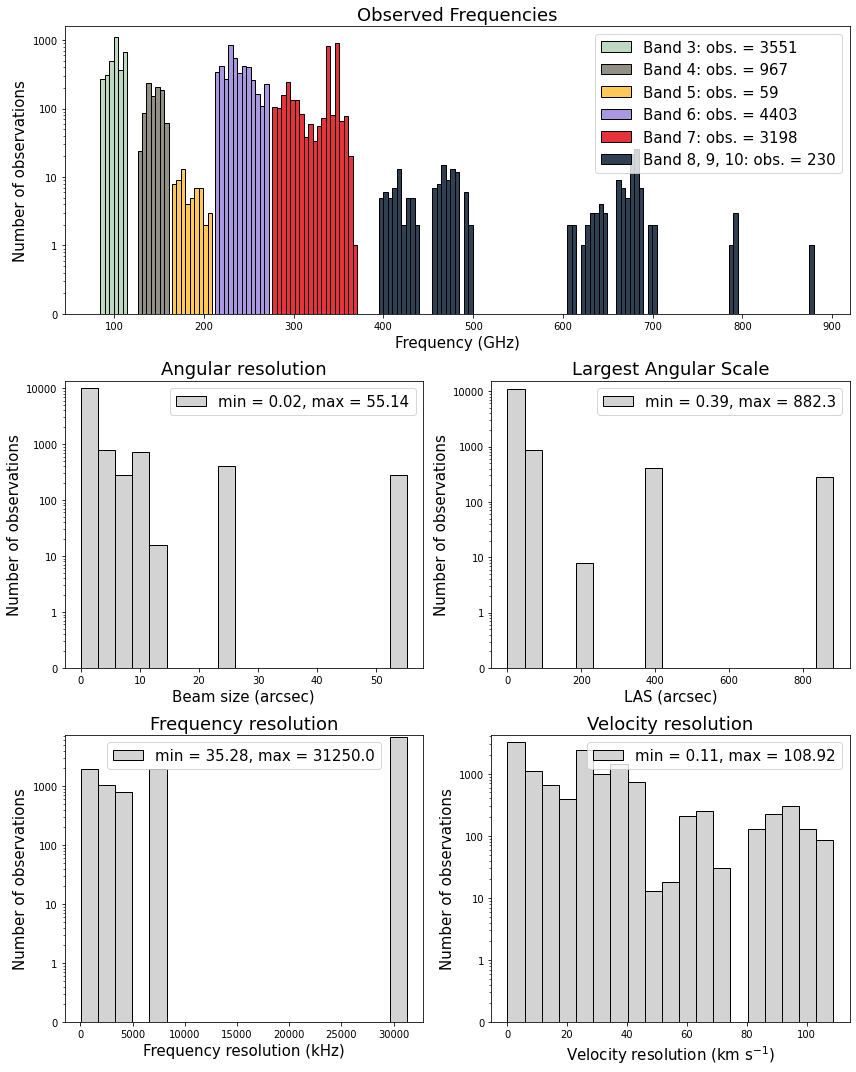

In [45]:
alminer.plot_overview(myquery)

### Example 3.6: Filter the results of the query in the previous example to contain only observations with angular resolutions < 3" & velocity resolution < 60 km/s
Hint: The query results is a pandas.DataFrame. You can print all columns by `pandas.DataFrame.columns` command where pandas.DataFrame is your query results. To get the description and units of a given column use the `alminer` command `alminer.get_info(column_name)`.

In [46]:
# Print all columns
print(myquery.columns)

# Get information about the columns of interest
alminer.get_info('ang_res_arcsec')
alminer.get_info('vel_res_kms')

Index(['Obs', 'project_code', 'ALMA_source_name', 'RAJ2000', 'DEJ2000',
       'ang_res_arcsec', 'min_freq_GHz', 'max_freq_GHz', 'central_freq_GHz',
       'bandwidth_GHz', 'freq_res_kHz', 'vel_res_kms', 'LAS_arcsec',
       'FoV_arcsec', 'cont_sens_bandwidth', 'line_sens_10kms',
       'line_sens_native', 'MOUS_id', 'collections', 'o_ucd',
       'obs_publisher_did', 'obs_collection', 'facility_name',
       'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level',
       'target_name', 's_ra', 's_dec', 's_fov', 's_region', 's_xel1', 's_xel2',
       'em_xel', 't_xel', 'pol_xel', 's_resolution', 't_min', 't_max',
       't_exptime', 't_resolution', 'em_min', 'em_max', 'em_res_power',
       'pol_states', 'access_url', 'access_format', 'access_estsize',
       'proposal_id', 'data_rights', 'gal_longitude', 'gal_latitude',
       'band_list', 'em_resolution', 'bandwidth', 'antenna_arrays',
       'is_mosaic', 'obs_release_date', 'spatial_resolution',
       'frequency_support', 'f

In [47]:
# Filter the table
sub_query = myquery[(myquery['ang_res_arcsec'] < 3) & 
                    (myquery['vel_res_kms'] < 60.0)]

#### Print the summary and plot the overview again, highlighting CO & its isotopologues:

In [48]:
alminer.summary(sub_query, print_targets=True)

--------------------------------
Number of projects = 257
Number of observations = 2284
Number of unique subbands = 3048
Total number of subbands = 8589
1463 target(s) with ALMA data = ['COSMOShighz_138', 'COSMOShighz_201', 'COSMOSLowz_64', 'COSMOSmedz_83', 'COSMOShighz_202', 'COSMOShighz_125', 'COSMOSmedz_102', 'COSMOShighz_113', 'COSMOS_medz_107', 'COSMOS_lowz_64', 'COSMOShighz_141', 'NGC 34', 'NGC 1614', 'vv114', 'NGC3256', 'IIZw096-Extended', 'NGC1614', 'Cosmic_Eye', 'Centaurus_A', 'himiko', 'ID112', 'ID192', 'ID158', 'ID093', 'ID209', 'ID125', 'ID117', 'ID204', 'ID098', 'ID239', 'ID217', 'ID143', 'ID163', 'ID107', 'ID225', 'ID247', 'ID220', 'ID244', 'ID182', 'ID177', 'NGC6240', 'SXDS-49523', 'HUDF', 'Eyelash', 'Cloverleaf', '4C23.56', 'LESS10', 'LESS76', 'LESS39', 'LESS5', 'LESS67', 'LESS9', 'LESS45', 'LESS1', 'LESS101', 'LESS112', 'LESS29', 'LESS17', 'LESS3', 'LESS15', 'LESS73', 'HATLAS_J084933.4', 'IOK-1', 'SXDF-NB1006-2', 'Ln1689-4', 'SSA22aC16', 'CDFS_dual', 'J1428+354', '3C_4

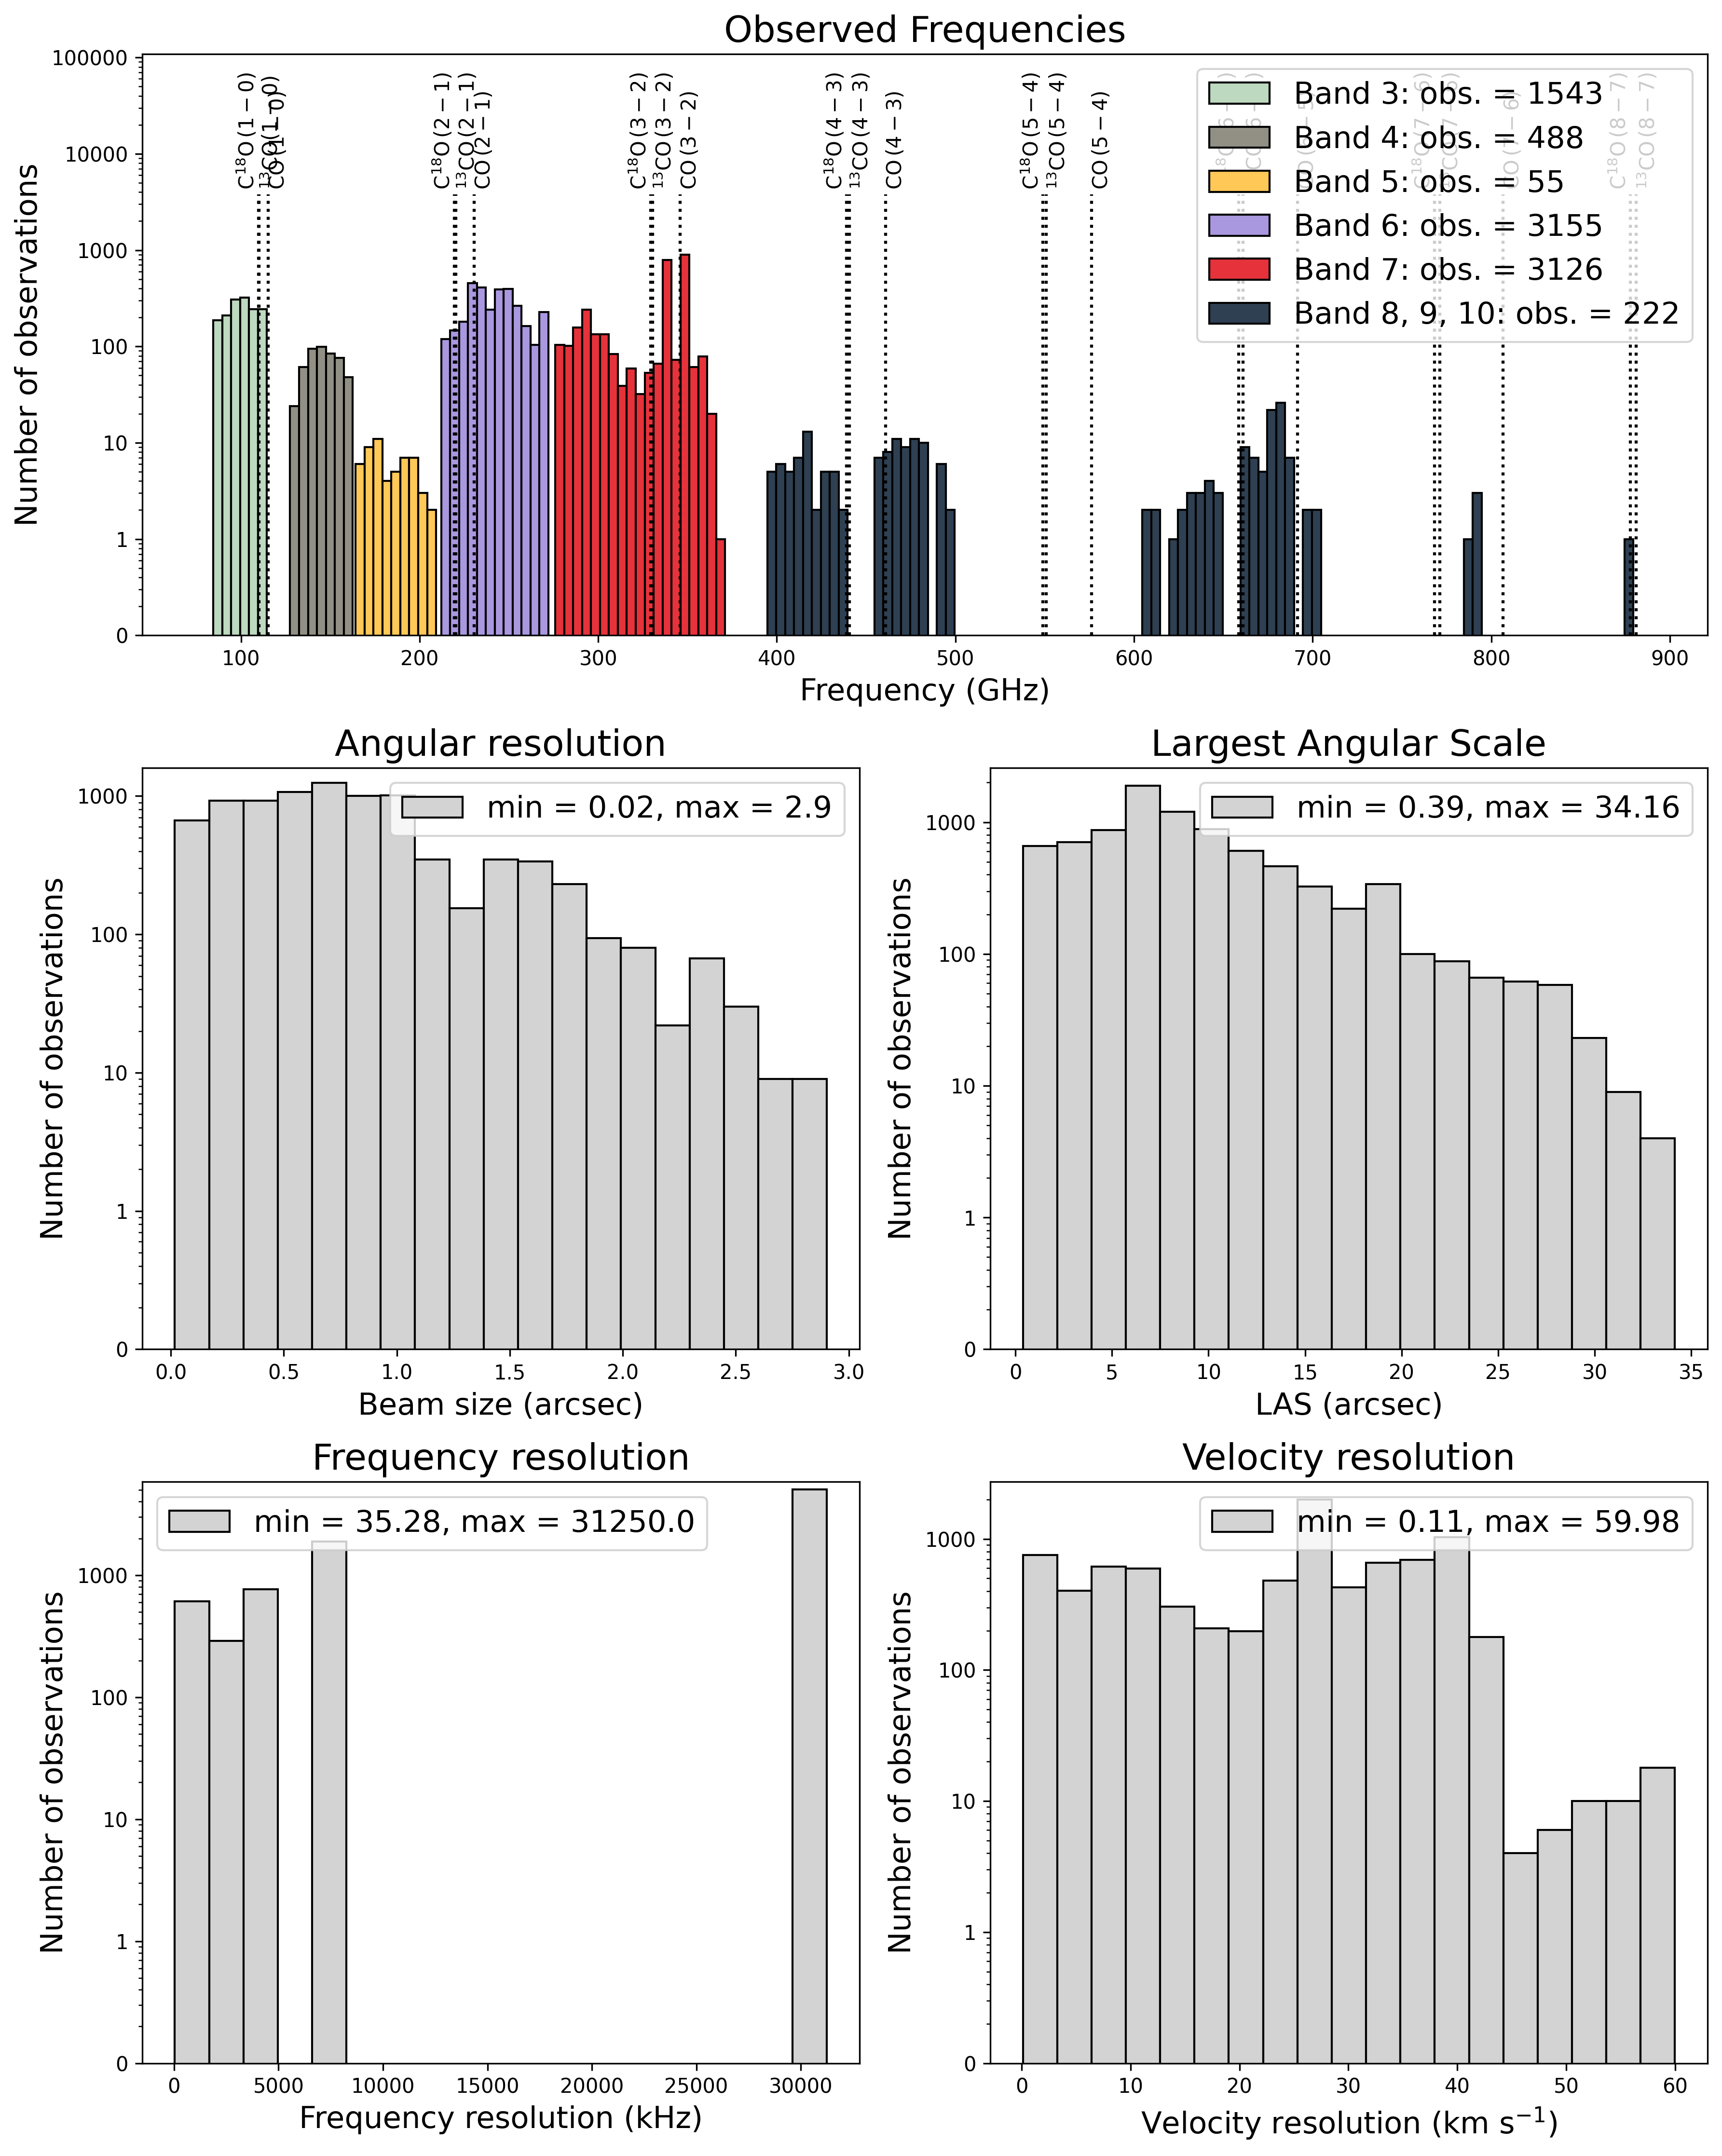

In [49]:
alminer.plot_overview(sub_query, mark_CO=True) # you can also specify a redshift using the 'z' parameter (default=0)

### Example 3.7: Search whether any CO lines and its isotopologues are covered in the above observations
Note that if you are interested in observations of targets at high-redshift, you can specify a redshift using the 'z' parameter.

In [50]:
CO_obs = alminer.CO_lines(sub_query, z=0) # you can also specify a redshift using the 'z' parameter (default=0)

--------------------------------
Summary of 'CO (1-0)' observations at 115.271 GHz
--------------------------------
Number of projects = 11
Number of observations = 30
Number of unique subbands = 22
Total number of subbands = 30
23 target(s) with ALMA data = ['Centaurus_A', 'ClJ1448+0856', 'NGC_1052', 'NGC_1399', 'NGC_5898', 'NGC_4697', 'NGC4742', 'NGC_4451', 'NGC_4376', 'NGC_1012', 'NGC_4150', 'NGC_4701', 'UGC8516', 'NGC_4396', 'NGC_4310', '2-20877', '2-14723', '2-33803', 'NGC_7465', 'SPT2353-50', 'BR1202-0725', 'ngc4550', 'XMM-1']
--------------------------------
--------------------------------
Summary of 'CO (2-1)' observations at 230.538 GHz
--------------------------------
Number of projects = 29
Number of observations = 283
Number of unique subbands = 43
Total number of subbands = 284
277 target(s) with ALMA data = ['ID209', 'ID239', 'ID247', 'ID244', 'SXDS-49523', 'HUDF', 'SXDF-NB1006-2', '186912', '205202', '53460', '64403', '179243', '26388', '132984', '45677', '207364', '510

### Example 3.8: Search whether a given frequency is covered in the observations

In [51]:
myline_obs = alminer.line_coverage(sub_query, 
                                   line_freq=89.0, 
                                   z=0, 
                                   line_name="My favourite line", 
                                   print_targets=True)

--------------------------------
Summary of 'My favourite line' observations at 89.0 GHz
--------------------------------
Number of projects = 21
Number of observations = 69
Number of unique subbands = 26
Total number of subbands = 69
61 target(s) with ALMA data = ['SPT_2349-50', 'SPT_2307-50', 'SPT_2353-50', 'SPT_2351-57', 'SPT_2354-58', 'SPT_2340-59', 'SPT_2335-53', 'SPT_2340-52', 'SPT_0002-52', 'SPT_2352-52', 'SPT_2311-54', 'SPT_2357-51', 'SPT_2349-56', 'SPT_2344-51', 'SPT_2319-55', 'NGC_4038', 'NGC_5253', 'M83', 'VV_219', 'ngc3256', 'SXDF-ALMA3', 'UDF_mosaic_3mm', 'ALESS124.1', 'ALESS080.1', 'ALESS009.1', 'ALESS003.1', 'ALESS005.1', 'ALESS110.5', 'ALESS031.1', 'ALESS035.1', 'ALESS068.1', 'ALESS079.1', 'ALESS023.1', 'ALESS022.1', 'ALESS019.2', '329214', 'NGC_3256', 'NGC_7465', 'Source_1', 'Source_4', 'Source_6', 'Source_3', 'Source_2', 'Source_5', 'CANDELS_-_GOODS_South', 'MACS0451-arc', 'ALESS001.1', 'SPT2351-57', 'ALMA_3mm_ID3', 'ALMA_3mm_ID10', 'ALMA_3mm_ID1_ID2', 'ALMA_3mm_ID5',

#### Highlight this frequency in the overview plots:

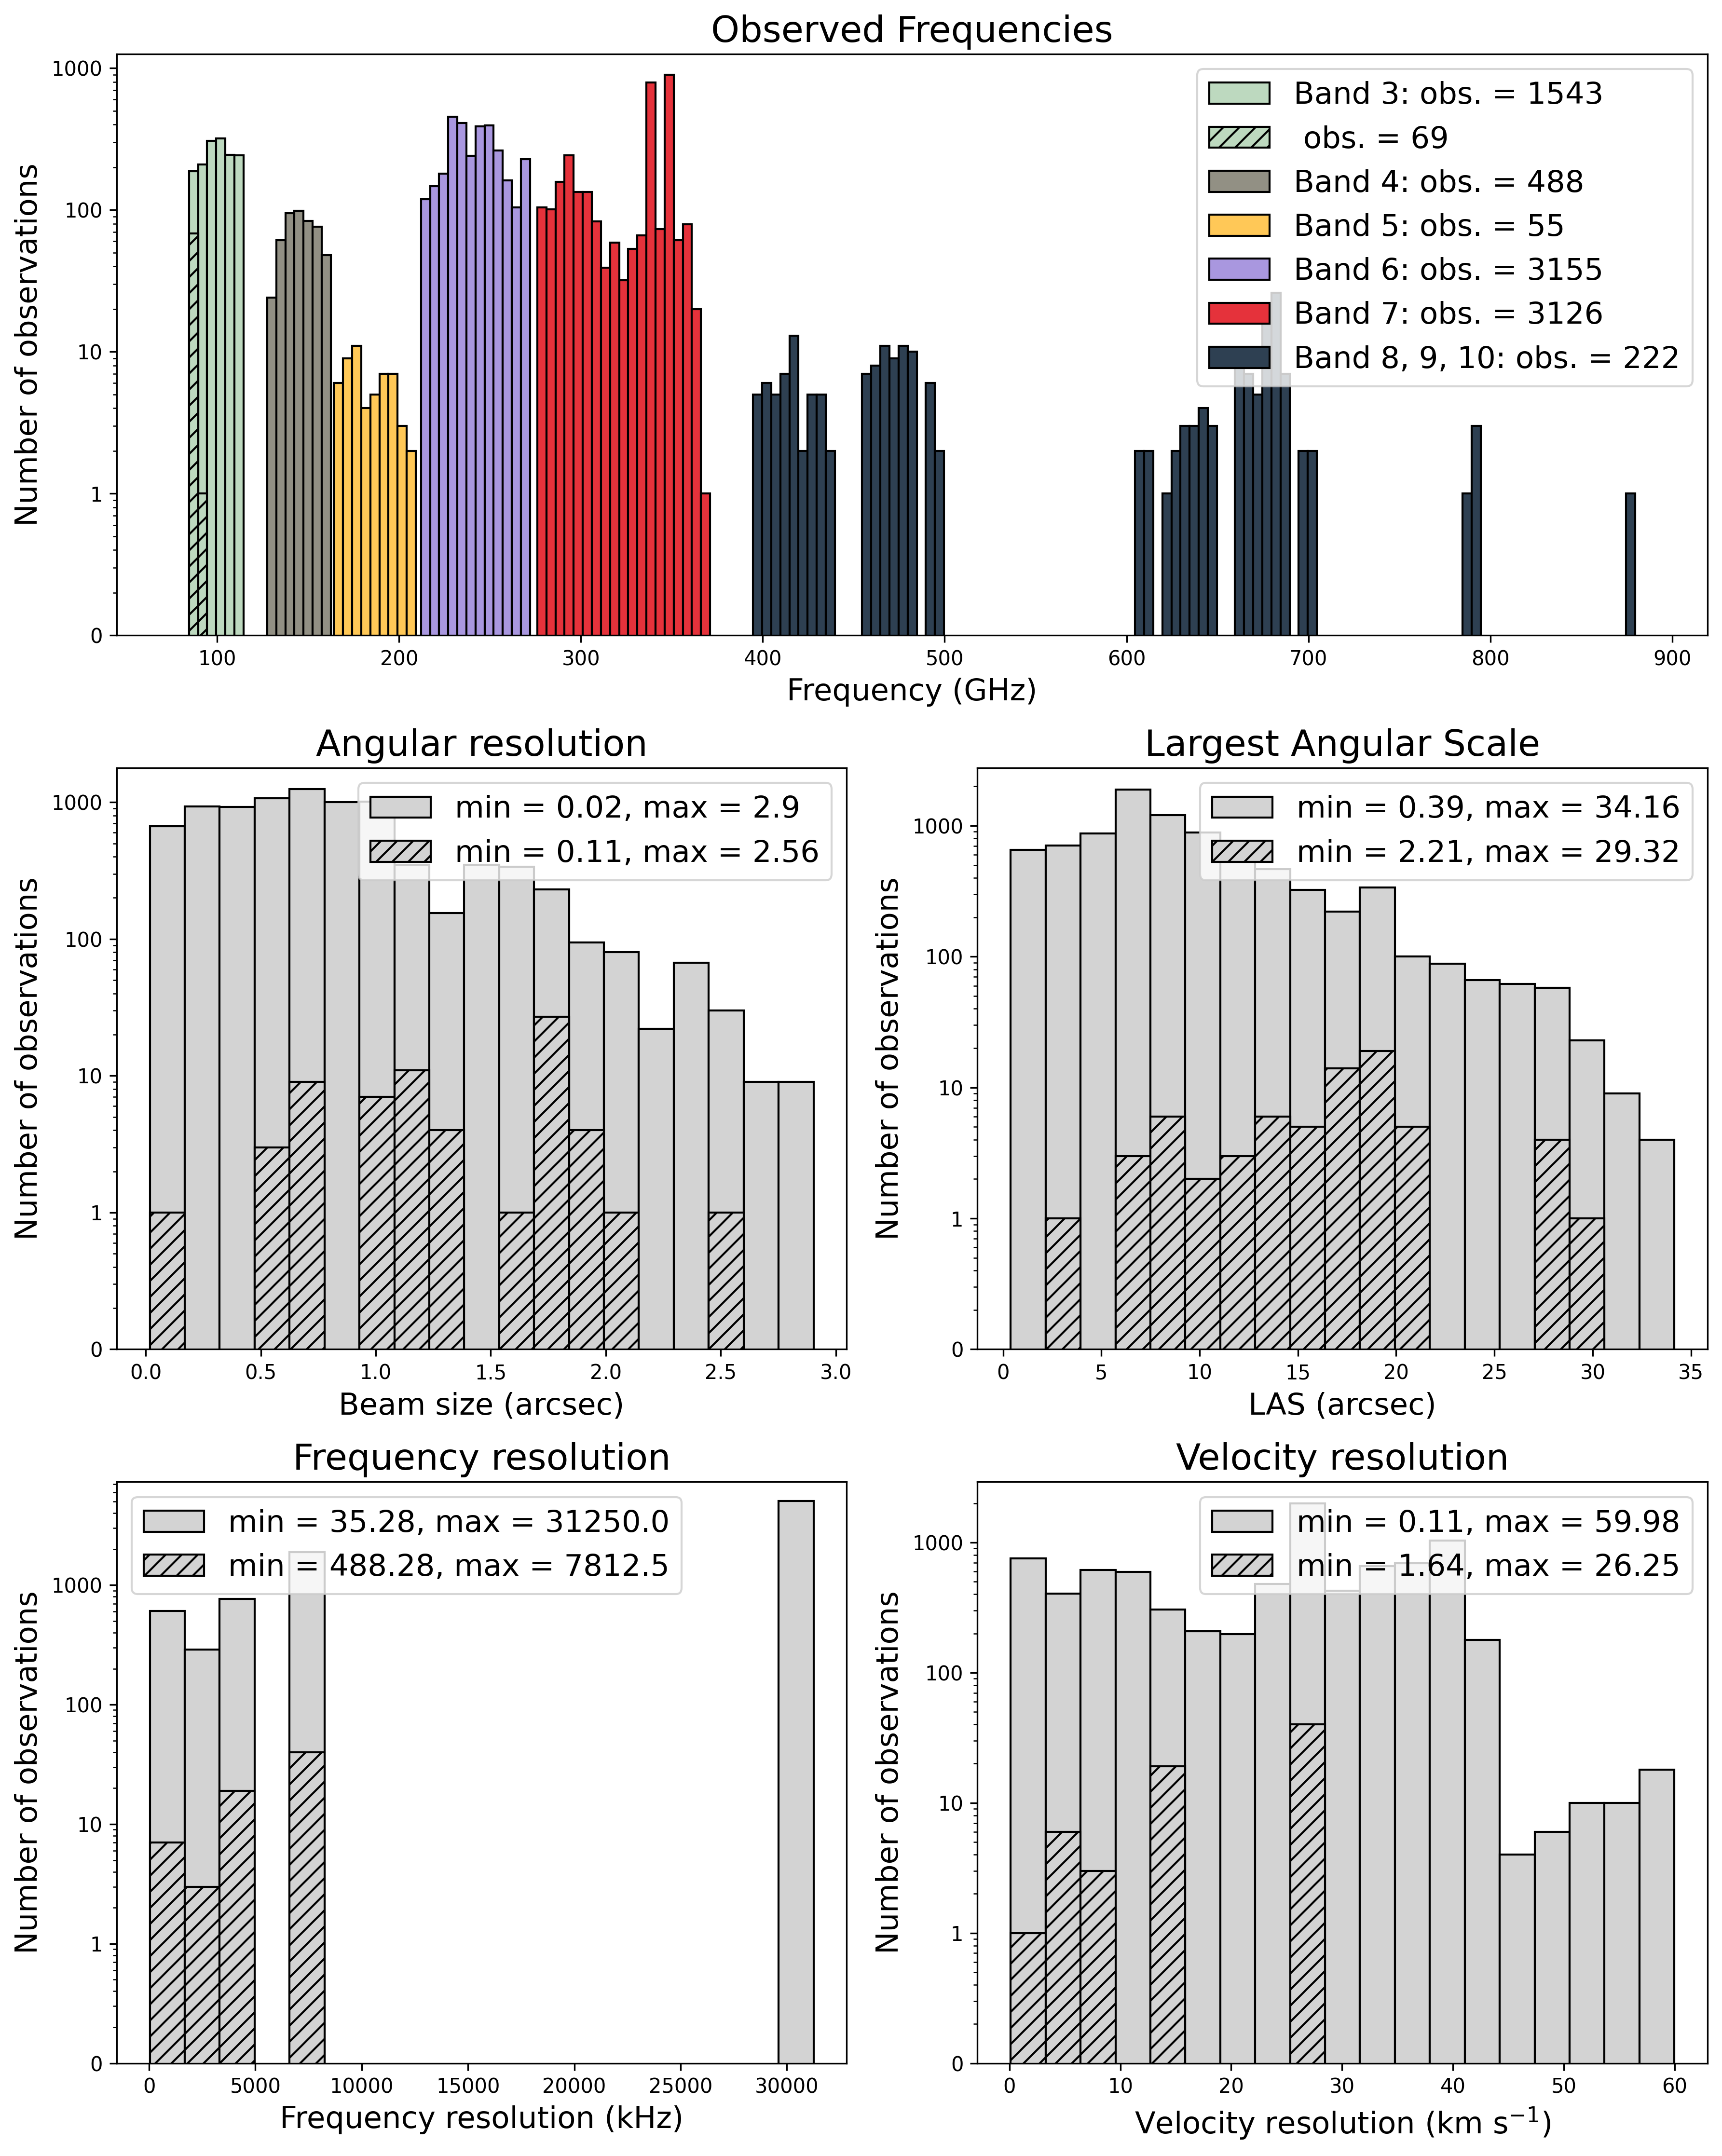

In [52]:
alminer.plot_line_overview(sub_query, line_freq=89.0)

### Example 3.9: Download all data products (raw + products) pertaining to the observations in example 3.7

In [53]:
alminer.download_data(myline_obs, fitsonly=False, dryrun=True, location='./data', print_urls=False)

This is a dryrun. To begin download, set dryrun=False.
Download location = ./data
Total number of Member OUSs to download = 27
Selected Member OUSs: ['uid://A002/X5a9a13/X551', 'uid://A002/X7fb989/X27', 'uid://A001/X13e/X186', 'uid://A001/X144/X15e', 'uid://A001/X144/X81', 'uid://A001/X2fb/X961', 'uid://A001/X2fe/X6d0', 'uid://A001/X87c/X20e', 'uid://A001/X879/Xbd', 'uid://A001/X879/Xd1', 'uid://A001/X879/X4a4', 'uid://A001/X879/X94e', 'uid://A001/X879/X94a', 'uid://A001/X879/X9ed', 'uid://A001/X128e/X370', 'uid://A001/X1288/X647', 'uid://A001/X12a3/X319', 'uid://A001/X1284/X1a80', 'uid://A001/X133d/X572', 'uid://A001/X133d/X1ce6', 'uid://A001/X133d/X1cec', 'uid://A001/X133d/X1ce9', 'uid://A001/X136d/X158', 'uid://A001/X136d/X164', 'uid://A001/X1467/X2b3', 'uid://A001/X1467/X2a7', 'uid://A001/X1465/X137f']
Number of files to download = 149
Needed disk space = 1.6 TB
--------------------------------


### Example 3.10: Download only continuum FITS images for the science target pertaining to the observations in example 3.8

In [54]:
alminer.download_data(myline_obs, fitsonly=True, dryrun=True, location='./data', 
                 filename_must_include=['_sci', '.pbcor', 'cont'], print_urls=True)

This is a dryrun. To begin download, set dryrun=False.
Download location = ./data
Total number of Member OUSs to download = 21
Selected Member OUSs: ['2013.1.00120.S_uid___A001_X13e_X186_external_ari_l_001_of_001.tar', '2015.1.00993.S_uid___A001_X2fb_X961_external_ari_l_001_of_001.tar', '2015.1.01222.S_uid___A001_X2fe_X6d0_external_ari_l_001_of_001.tar', '2016.1.00324.L_uid___A001_X87c_X20e_001_of_001.tar', '2016.1.00564.S_uid___A001_X879_Xbd_external_ari_l_001_of_001.tar', '2016.1.00564.S_uid___A001_X879_Xd1_001_of_001.tar', '2016.1.00932.S_uid___A001_X879_X4a4_001_of_001.tar', '2016.1.00965.S_uid___A001_X879_X94e_001_of_001.tar', '2016.1.00965.S_uid___A001_X879_X94a_001_of_001.tar', '2016.1.01119.S_uid___A001_X879_X9ed_external_ari_l_001_of_001.tar', '2017.1.00033.S_uid___A001_X128e_X370_001_of_001.tar', '2017.1.00581.S_uid___A001_X12a3_X319_001_of_001.tar', '2017.1.01512.S_uid___A001_X1284_X1a80_001_of_001.tar', '2018.1.00046.S_uid___A001_X133d_X572_001_of_001.tar', '2018.1.00478.S_

### Example 3.11: Send a pyVO query using ALminer (e.g. the same query as Example 2.4) and convert it to ALminer format

In [55]:
query_str = "select * \
             from ivoa.ObsCore \
             WHERE frequency > 300 \
             AND frequency < 400 \
             AND sensitivity_10kms < 5 \
             AND science_keyword LIKE '%disk%'"

myquery = alminer.run_query(query_str)
myquery_obs = alminer.filter_results(myquery, print_targets=False)

--------------------------------
Number of projects = 45
Number of observations = 555
Number of unique subbands = 483
Total number of subbands = 2243
Total number of targets with ALMA data = 410
--------------------------------


Now you can use all the analysis and plotting routines presented before on these observations.

# Part 4: Your workstation

In this section you can make your own queries by using any of the introduced methods. Feel free to request help from any of us in the room. 

Happy mining!